# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson, normaltest, kstest, norm
from statsmodels.graphics.gofplots import qqplot

# ----------------------
# CONFIGURATION
# ----------------------
STOCKS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'JPM', 'NVDA', 'SPY', 'QQQ']
START_DATE = '2015-01-01'
END_DATE = '2025-01-01'
ROLLING_WINDOW = 252  # 1 year of trading days
OUTLIER_PERCENTILE = 0.01  # Remove top/bottom 1% for outlier analysis
PORTFOLIO_WEIGHTS = {'AAPL': 0.2, 'MSFT': 0.2, 'GOOGL': 0.2, 'AMZN': 0.2, 'META': 0.2}  # Example portfolio

# ----------------------
# 1. DATA COLLECTION
# ----------------------
def download_data(tickers, start, end):
    """
    Download historical price data for the given tickers.
    """
    raw = yf.download(tickers, start=start, end=end)
    # Use 'Adj Close' if available, otherwise use 'Close'
    if 'Adj Close' in raw.columns:
        data = raw['Adj Close']
    else:
        data = raw['Close']
    return data

# ----------------------
# 2. LOG RETURN CALCULATION
# ----------------------
def compute_log_returns(prices):
    """
    Calculate log returns from price data.
    """
    return np.log(prices / prices.shift(1)).dropna()

# ----------------------
# 3. NORMALITY TESTS (Q5)
# ----------------------
def normality_tests(series, verbose=True):
    """
    Perform several normality tests on a series of log returns.
    Used for Q5: Test if log returns of stocks are normally distributed.
    """
    results = {}
    # Shapiro-Wilk test
    stat, p = shapiro(series)
    results['Shapiro-Wilk'] = (stat, p)
    # Anderson-Darling test
    ad = anderson(series, dist='norm')
    results['Anderson-Darling'] = (ad.statistic, ad.critical_values, ad.significance_level)
    # D'Agostino and Pearson's test
    stat, p = normaltest(series)
    results["D'Agostino-Pearson"] = (stat, p)
    # Kolmogorov-Smirnov test
    stat, p = kstest(series, 'norm', args=(series.mean(), series.std()))
    results['Kolmogorov-Smirnov'] = (stat, p)
    if verbose:
        print("Shapiro-Wilk: stat=%.4f, p=%.4f" % results['Shapiro-Wilk'])
        print("Anderson-Darling: stat=%.4f" % results['Anderson-Darling'][0])
        print("D'Agostino-Pearson: stat=%.4f, p=%.4f" % results["D'Agostino-Pearson"])
        print("Kolmogorov-Smirnov: stat=%.4f, p=%.4f" % results['Kolmogorov-Smirnov'])
    return results

# ----------------------
# 4. VISUALIZATION
# ----------------------
def plot_distribution(series, title):
    """
    Plot histogram and Q-Q plot for a series of log returns.
    """
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.hist(series, bins=50, alpha=0.7, color='skyblue', density=True)
    x = np.linspace(series.min(), series.max(), 100)
    plt.plot(x, norm.pdf(x, series.mean(), series.std()), 'r-', lw=2)
    plt.title(f"Histogram: {title}")
    plt.subplot(1,2,2)
    qqplot(series, line='s', ax=plt.gca())
    plt.title(f"Q-Q Plot: {title}")
    plt.tight_layout()
    plt.show()

# ----------------------
# 5. ROLLING WINDOW NORMALITY (Q1, Q4)
# ----------------------
def rolling_normality(series, window=252):
    """
    Test for normality in rolling windows.
    Used for Q1: Are there periods when log-returns are normal?
    Used for Q4: Are there periods when a portfolio's log-returns are normal?
    """
    pvals = []
    for i in range(window, len(series)):
        window_data = series.iloc[i-window:i]
        _, p = shapiro(window_data)
        pvals.append(p)
    return pd.Series(pvals, index=series.index[window:])

# ----------------------
# 6. REMOVE EXTREMES AND RETEST (Q2)
# ----------------------
def remove_extremes(series, percentile=0.01):
    """
    Remove the most extreme log returns (outliers).
    Used for Q2: Does removing extremes make the distribution more normal?
    """
    lower = series.quantile(percentile)
    upper = series.quantile(1-percentile)
    return series[(series >= lower) & (series <= upper)]

# ----------------------
# 7. PORTFOLIO LOG RETURNS (Q3, Q4)
# ----------------------
def portfolio_log_returns(log_returns, weights):
    """
    Compute log returns for a weighted portfolio.
    Used for Q3: Create a portfolio with most normal log returns.
    Used for Q4: Test a user portfolio for normality.
    """
    # Align columns and weights
    log_returns = log_returns[list(weights.keys())]
    w = np.array([weights[t] for t in log_returns.columns])
    return log_returns.dot(w)

In [2]:
# STOCKS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'JPM', 'NVDA', 'SPY', 'QQQ']
print("Downloading data...")
prices = download_data(STOCKS, START_DATE, END_DATE)
log_returns = compute_log_returns(prices)

/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_14211/2679579751.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(tickers, start=start, end=end)
[*********************100%***********************]  10 of 10 completed


# Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.


Normality tests for each stock (full period):

--- AAPL ---
Shapiro-Wilk: stat=0.9417, p=0.0000
Anderson-Darling: stat=27.9877
D'Agostino-Pearson: stat=318.8463, p=0.0000
Kolmogorov-Smirnov: stat=0.0773, p=0.0000


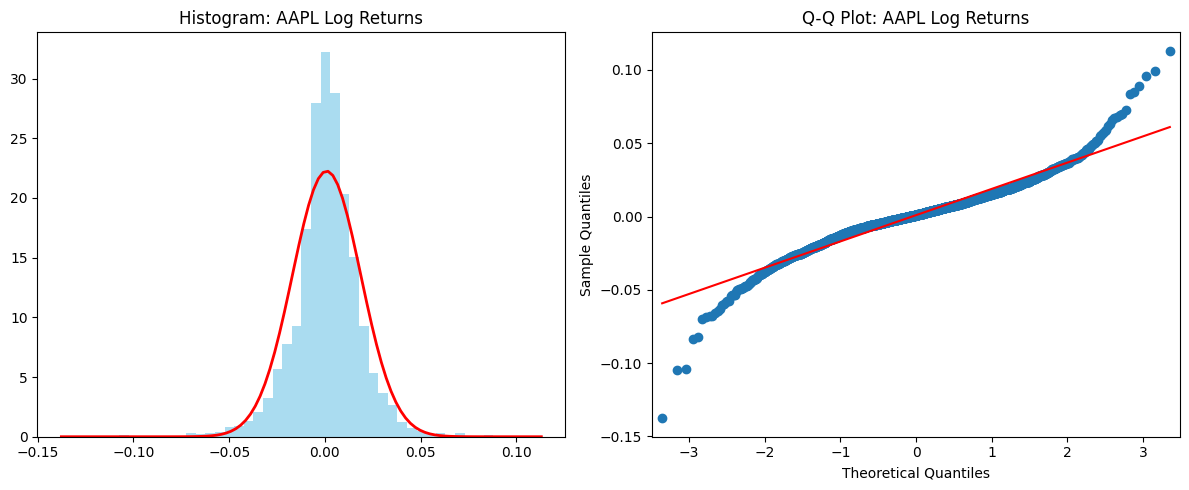


--- MSFT ---
Shapiro-Wilk: stat=0.9255, p=0.0000
Anderson-Darling: stat=32.4427
D'Agostino-Pearson: stat=408.4662, p=0.0000
Kolmogorov-Smirnov: stat=0.0799, p=0.0000


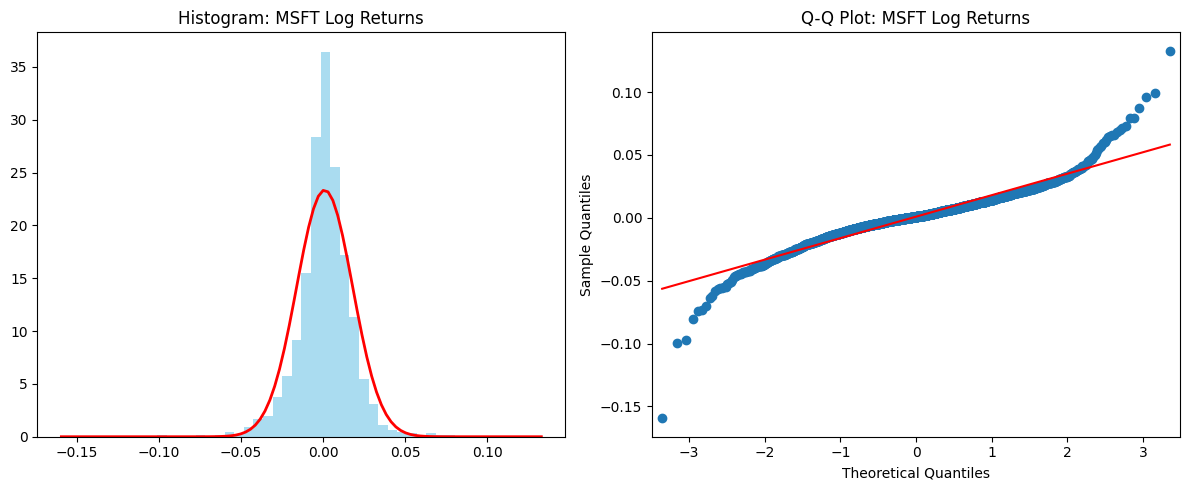


--- GOOGL ---
Shapiro-Wilk: stat=0.9346, p=0.0000
Anderson-Darling: stat=31.8637
D'Agostino-Pearson: stat=331.3704, p=0.0000
Kolmogorov-Smirnov: stat=0.0752, p=0.0000


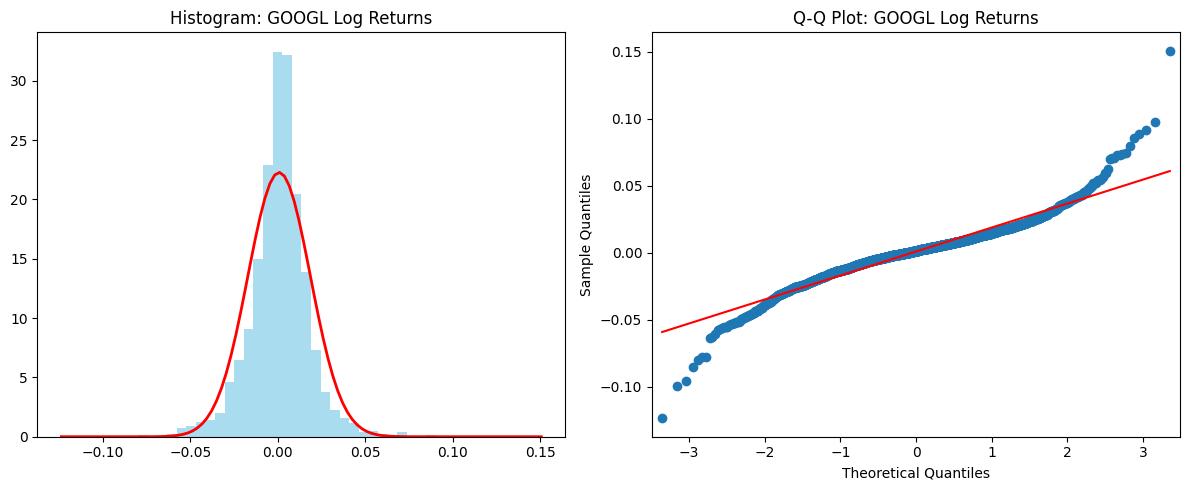


--- AMZN ---
Shapiro-Wilk: stat=0.9348, p=0.0000
Anderson-Darling: stat=30.9124
D'Agostino-Pearson: stat=326.5299, p=0.0000
Kolmogorov-Smirnov: stat=0.0743, p=0.0000


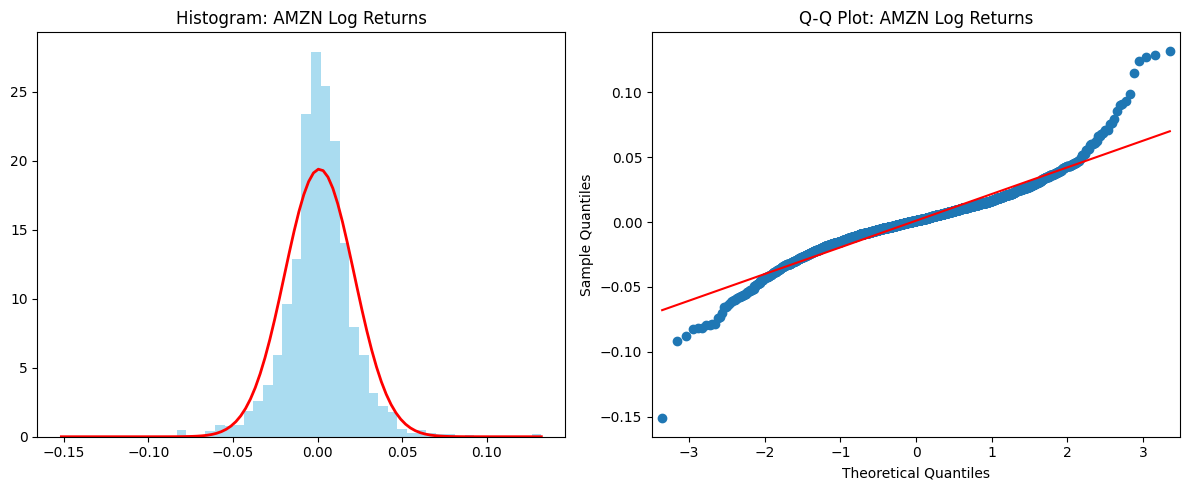


--- META ---
Shapiro-Wilk: stat=0.8398, p=0.0000
Anderson-Darling: stat=54.2599
D'Agostino-Pearson: stat=1131.2207, p=0.0000
Kolmogorov-Smirnov: stat=0.0956, p=0.0000


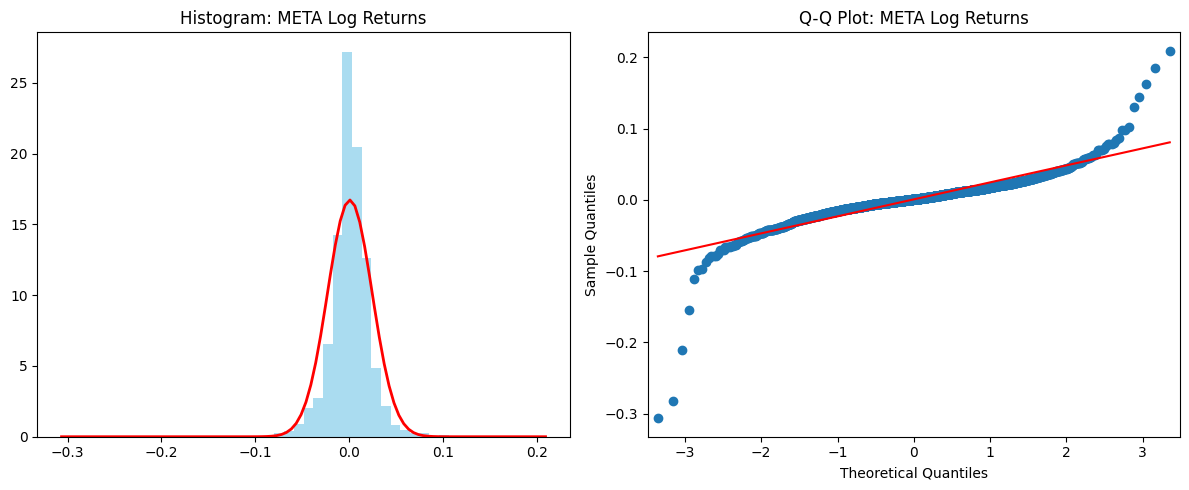


--- TSLA ---
Shapiro-Wilk: stat=0.9464, p=0.0000
Anderson-Darling: stat=28.2918
D'Agostino-Pearson: stat=257.5469, p=0.0000
Kolmogorov-Smirnov: stat=0.0652, p=0.0000


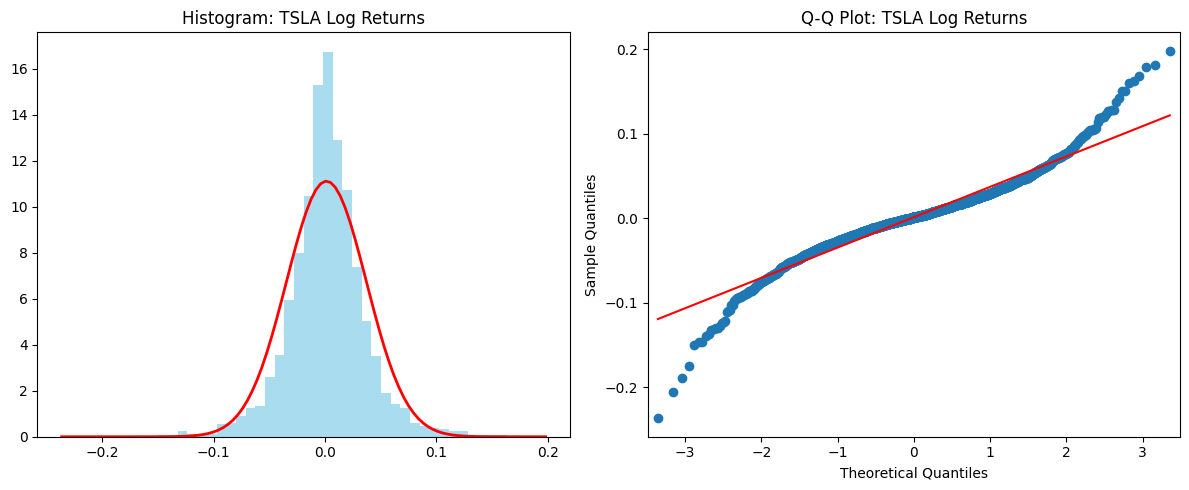


--- JPM ---
Shapiro-Wilk: stat=0.8886, p=0.0000
Anderson-Darling: stat=43.6220
D'Agostino-Pearson: stat=526.0984, p=0.0000
Kolmogorov-Smirnov: stat=0.0885, p=0.0000


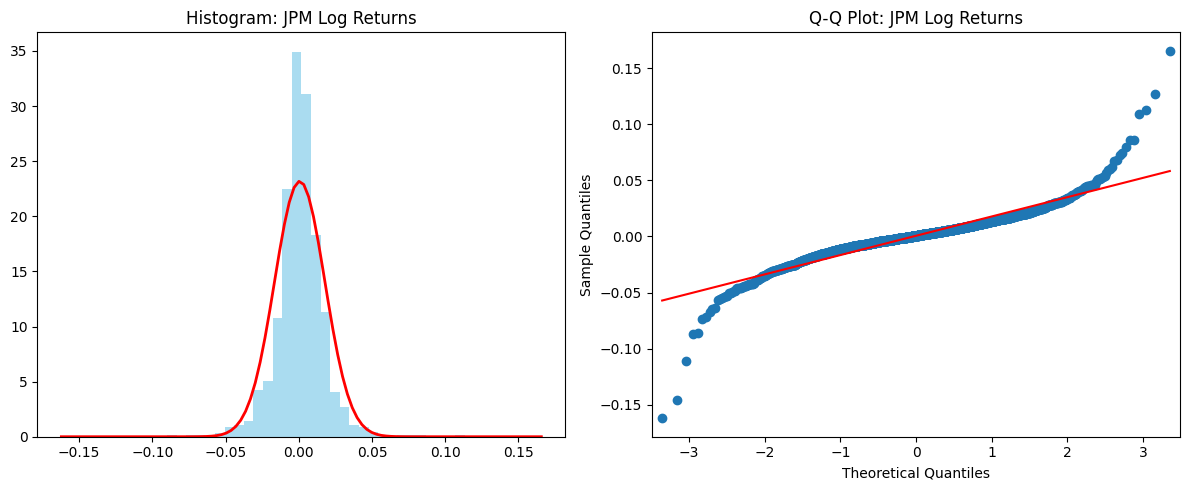


--- NVDA ---
Shapiro-Wilk: stat=0.9391, p=0.0000
Anderson-Darling: stat=24.8801
D'Agostino-Pearson: stat=372.2446, p=0.0000
Kolmogorov-Smirnov: stat=0.0647, p=0.0000


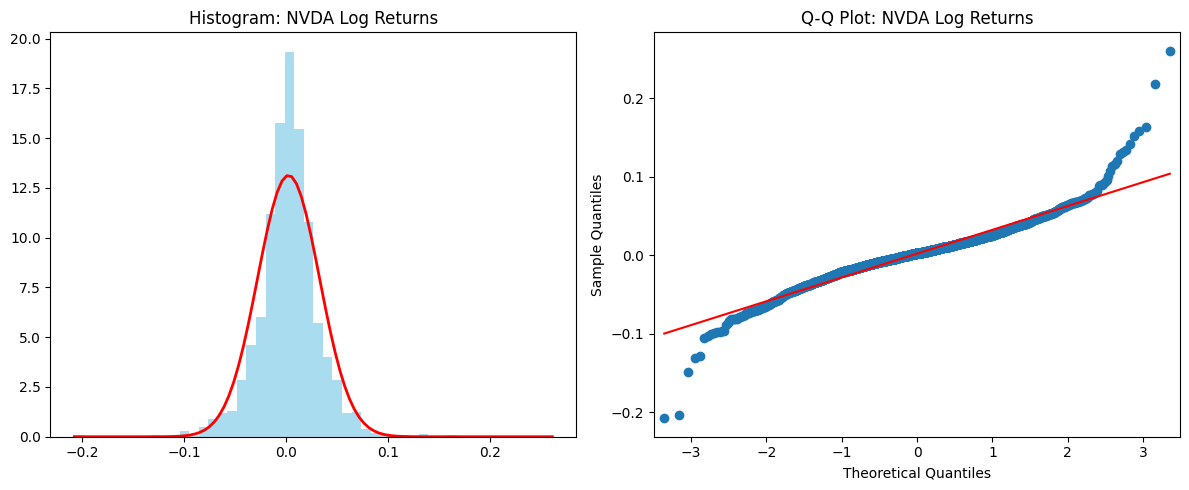


--- SPY ---
Shapiro-Wilk: stat=0.8842, p=0.0000
Anderson-Darling: stat=50.4312
D'Agostino-Pearson: stat=740.5342, p=0.0000
Kolmogorov-Smirnov: stat=0.1065, p=0.0000


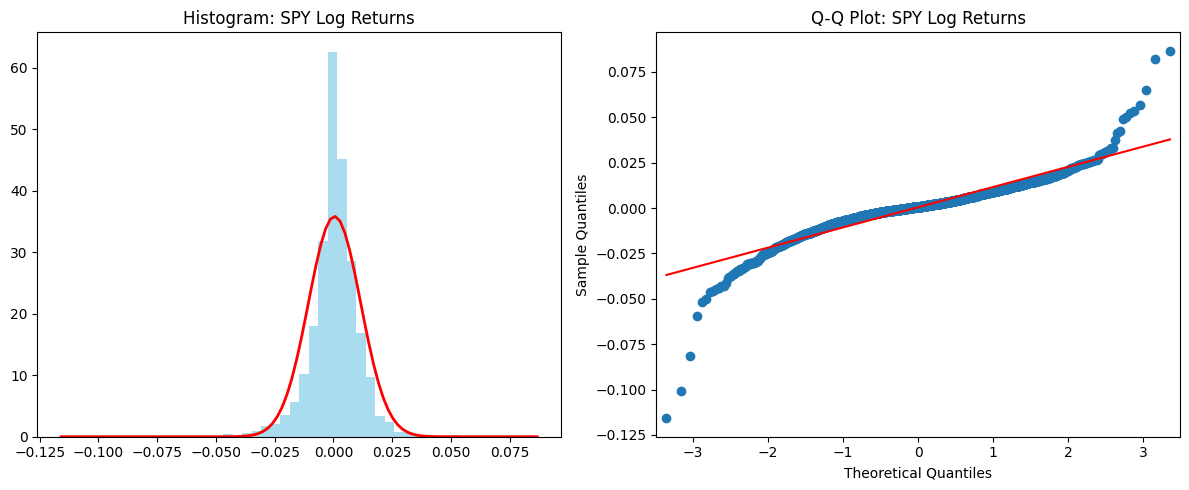


--- QQQ ---
Shapiro-Wilk: stat=0.9325, p=0.0000
Anderson-Darling: stat=35.2348
D'Agostino-Pearson: stat=467.8949, p=0.0000
Kolmogorov-Smirnov: stat=0.0907, p=0.0000


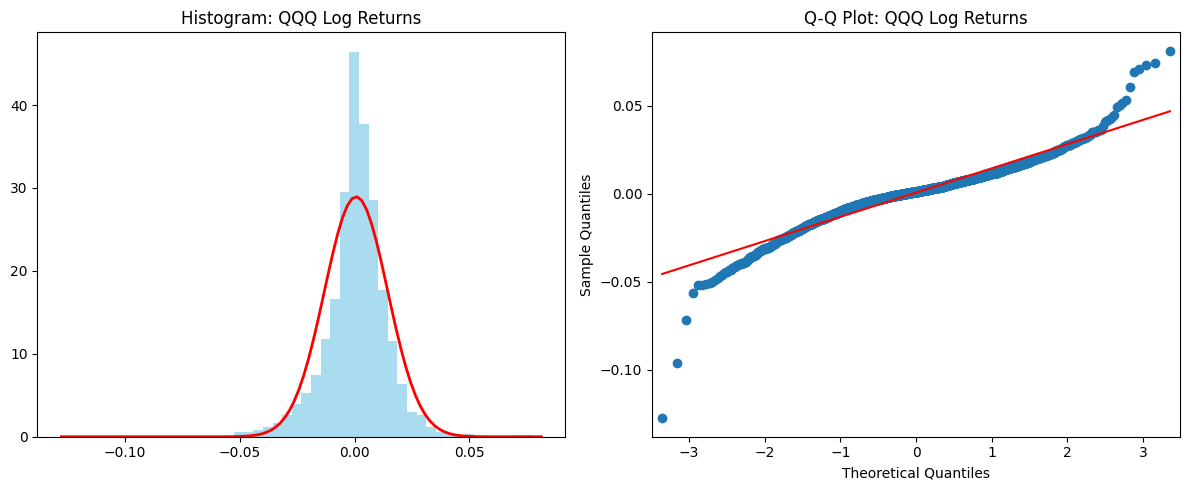

In [3]:
# Q5: Test if log returns of stocks are normally distributed
print("\nNormality tests for each stock (full period):")
for ticker in STOCKS:
    print(f"\n--- {ticker} ---")
    normality_tests(log_returns[ticker])
    plot_distribution(log_returns[ticker], f"{ticker} Log Returns")

# Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.


Rolling window normality (Shapiro-Wilk p-values):


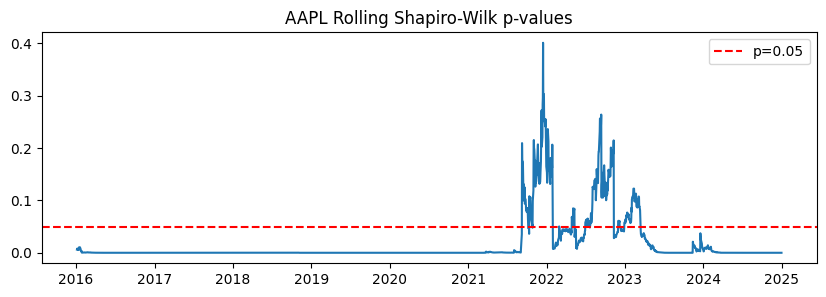

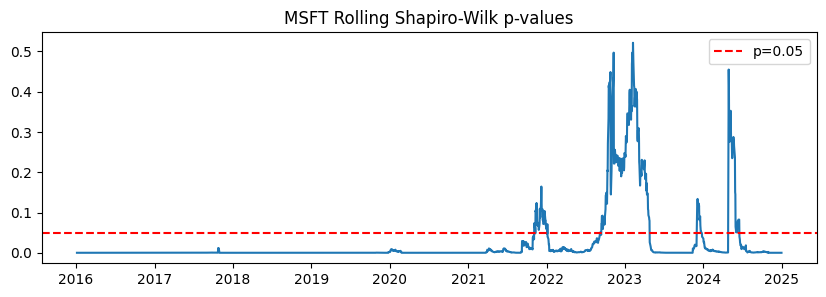

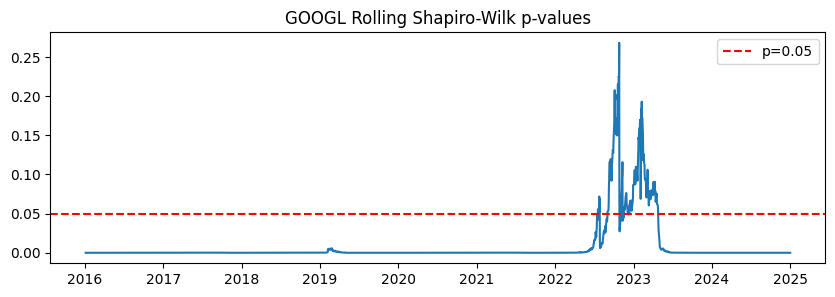

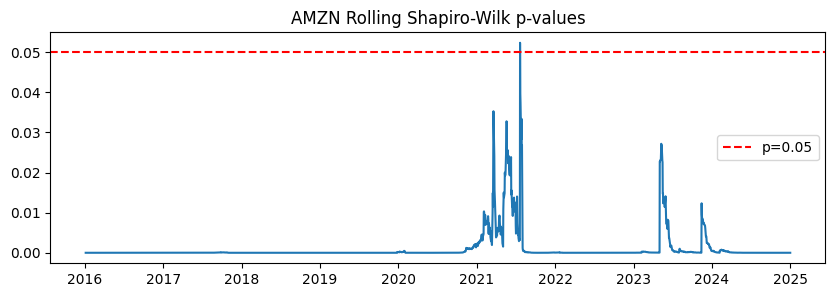

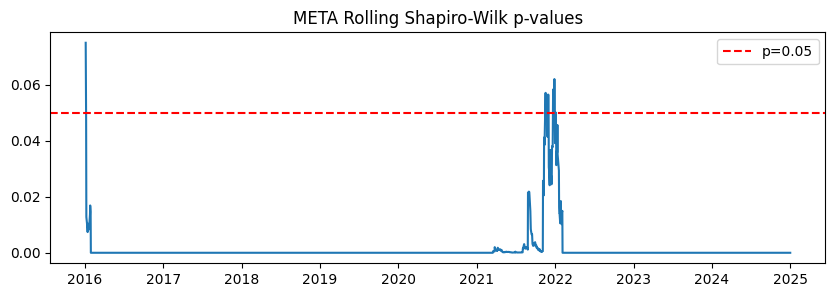

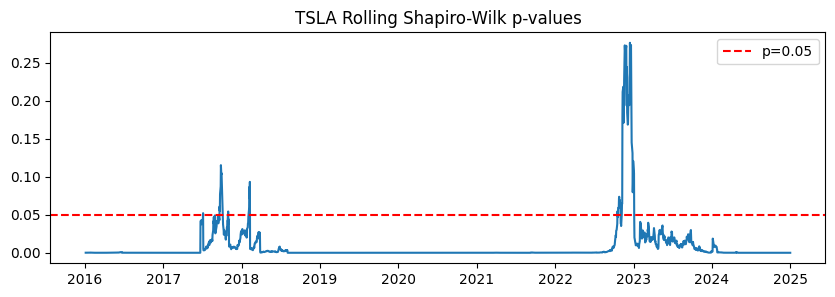

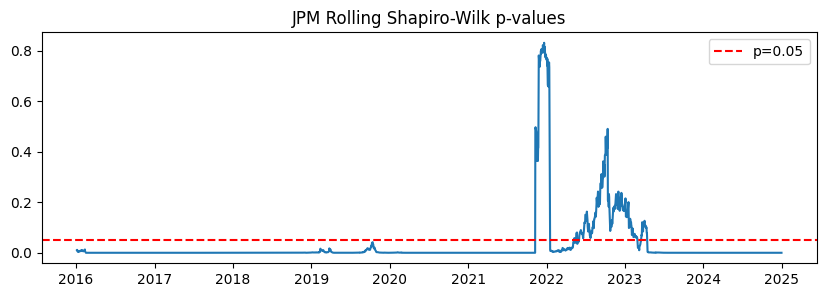

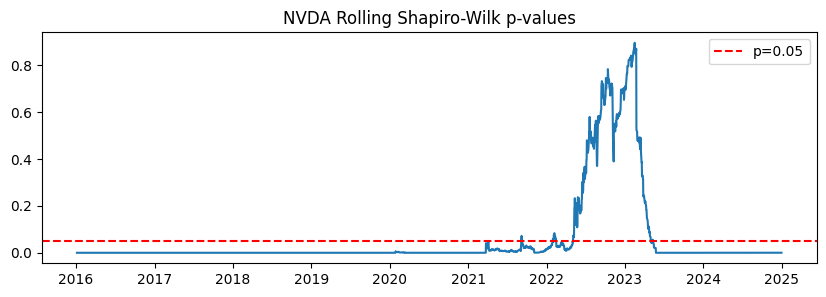

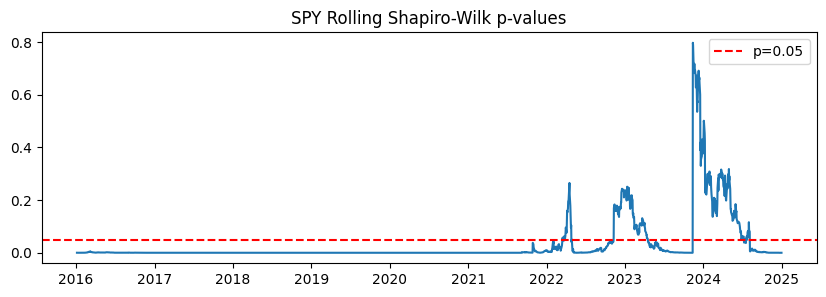

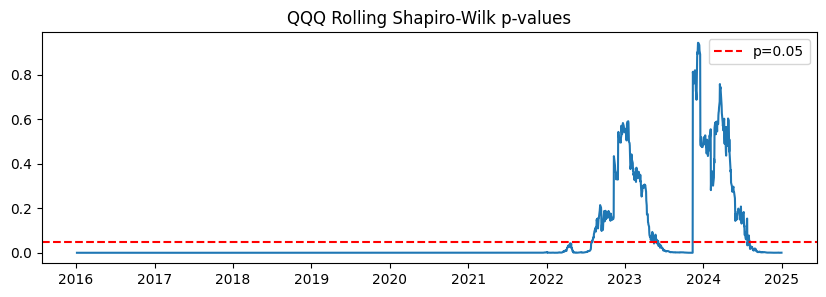

In [4]:
# Q1: Test for periods of normality using rolling windows
print("\nRolling window normality (Shapiro-Wilk p-values):")
for ticker in STOCKS:
    pvals = rolling_normality(log_returns[ticker], window=ROLLING_WINDOW)
    plt.figure(figsize=(10,3))
    plt.plot(pvals)
    plt.axhline(0.05, color='red', linestyle='--', label='p=0.05')
    plt.title(f"{ticker} Rolling Shapiro-Wilk p-values")
    plt.legend()
    plt.show()

## QQ Plots of the normal windows

Here we collect the periods of time that pass the Shapiro-Wilk p-value test which also passes all the other tests of normality. We collect 4 such periods ranked by their length

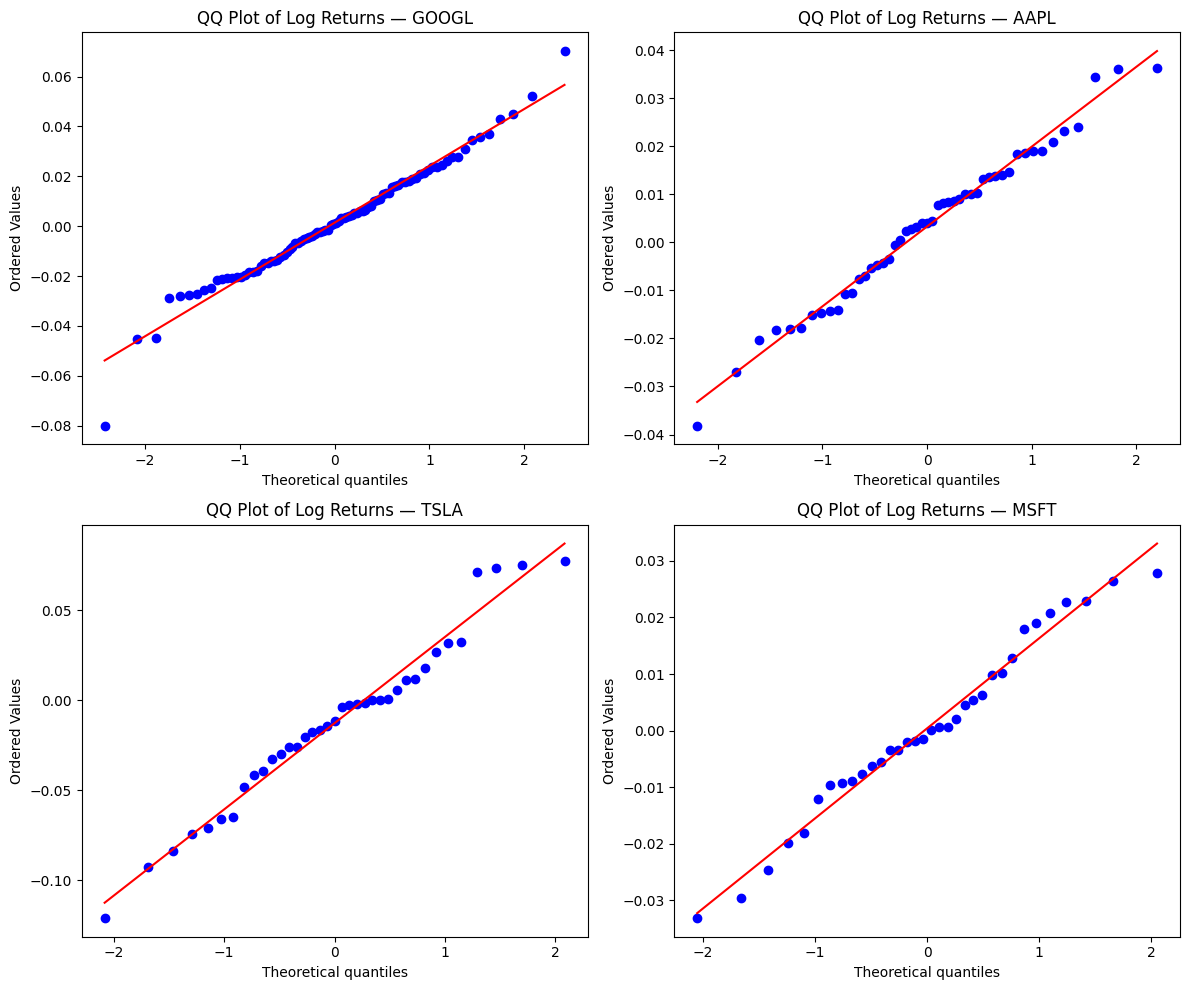

In [5]:
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')
# Define stock tickers and date ranges
stock_periods = {
    "GOOGL": ("2022-12-12", "2023-04-25"),
    "AAPL":  ("2022-12-30", "2023-03-15"),
    "TSLA":  ("2022-11-07", "2023-01-03"),
    "MSFT":  ("2021-11-11", "2022-01-03")
}

# Function to calculate log returns
def get_log_returns(ticker, start, end):
    df = yf.download(ticker, start=start, end=end, progress=False)
    df['LogRet'] = np.log(df['Close'] / df['Close'].shift(1))
    return df['LogRet'].dropna()

# Fetch data and calculate log returns
log_rets = {t: get_log_returns(t, s, e) for t, (s, e) in stock_periods.items()}

# Plot QQ plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()
for ax, (t, lr) in zip(axs, log_rets.items()):
    probplot(lr, dist="norm", plot=ax)
    ax.set_title(f"QQ Plot of Log Returns — {t}")
plt.tight_layout()
plt.show()

# Test if removing extremal return data creates a distribution with evidence of being normal.


Normality after removing extremes:

--- AAPL (extremes removed) ---
Shapiro-Wilk: stat=0.9928, p=0.0000
Anderson-Darling: stat=1.9460
D'Agostino-Pearson: stat=17.9135, p=0.0001
Kolmogorov-Smirnov: stat=0.0210, p=0.2660


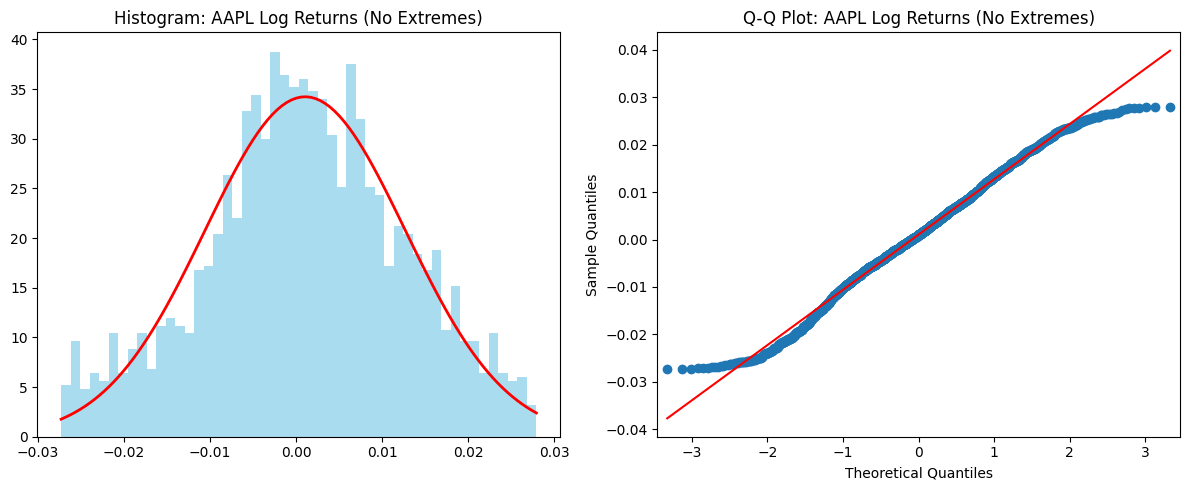


--- MSFT (extremes removed) ---
Shapiro-Wilk: stat=0.9924, p=0.0000
Anderson-Darling: stat=2.3144
D'Agostino-Pearson: stat=18.4311, p=0.0001
Kolmogorov-Smirnov: stat=0.0230, p=0.1785


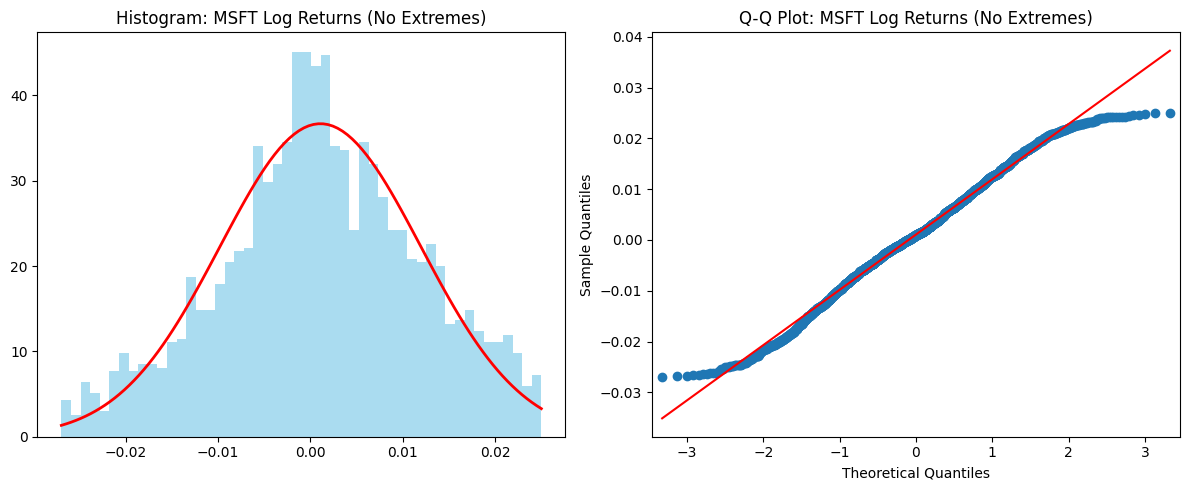


--- GOOGL (extremes removed) ---
Shapiro-Wilk: stat=0.9908, p=0.0000
Anderson-Darling: stat=3.1972
D'Agostino-Pearson: stat=30.0170, p=0.0000
Kolmogorov-Smirnov: stat=0.0290, p=0.0435


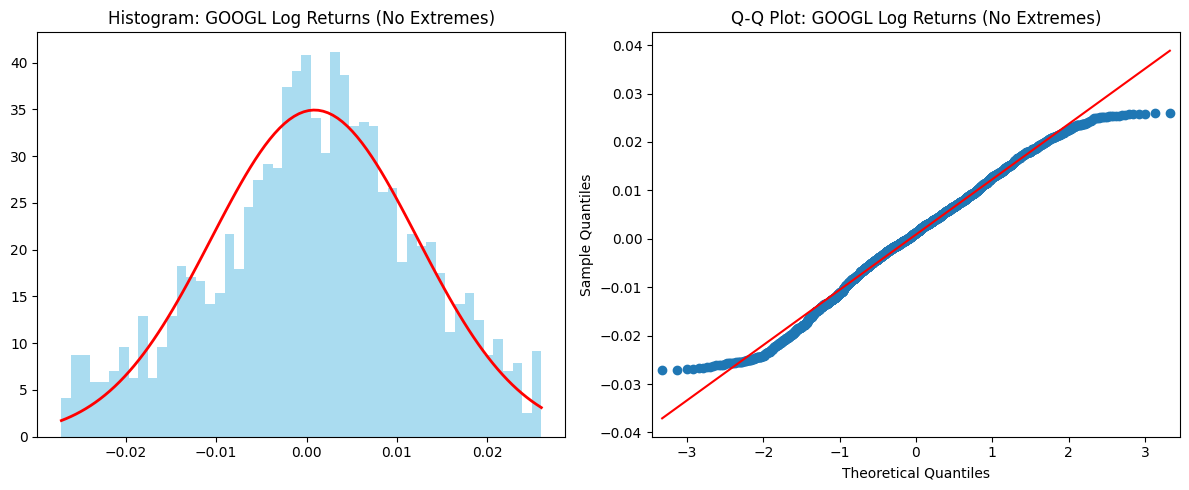


--- AMZN (extremes removed) ---
Shapiro-Wilk: stat=0.9948, p=0.0000
Anderson-Darling: stat=0.9677
D'Agostino-Pearson: stat=19.2358, p=0.0001
Kolmogorov-Smirnov: stat=0.0135, p=0.7996


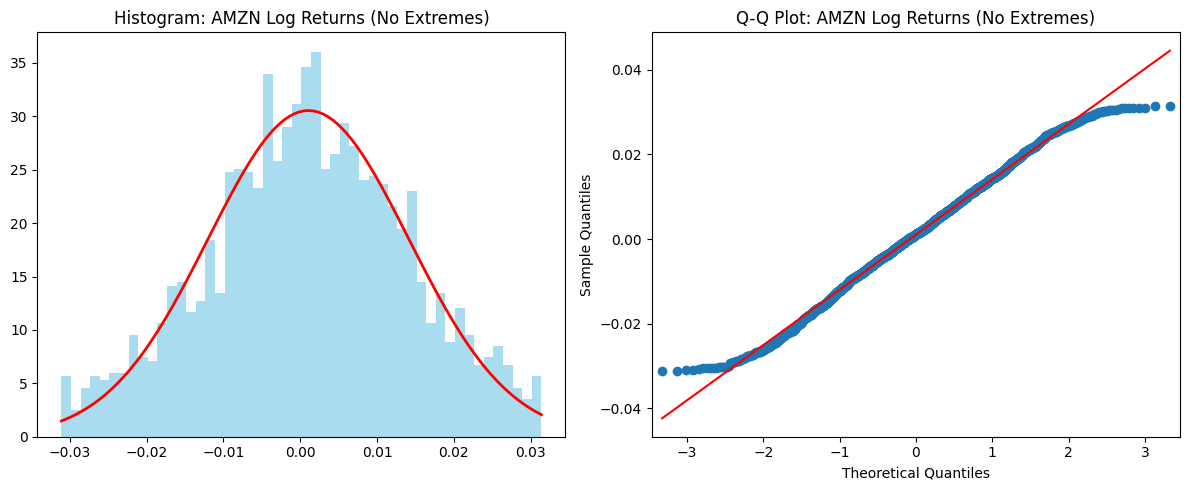


--- META (extremes removed) ---
Shapiro-Wilk: stat=0.9937, p=0.0000
Anderson-Darling: stat=1.8449
D'Agostino-Pearson: stat=23.2360, p=0.0000
Kolmogorov-Smirnov: stat=0.0218, p=0.2277


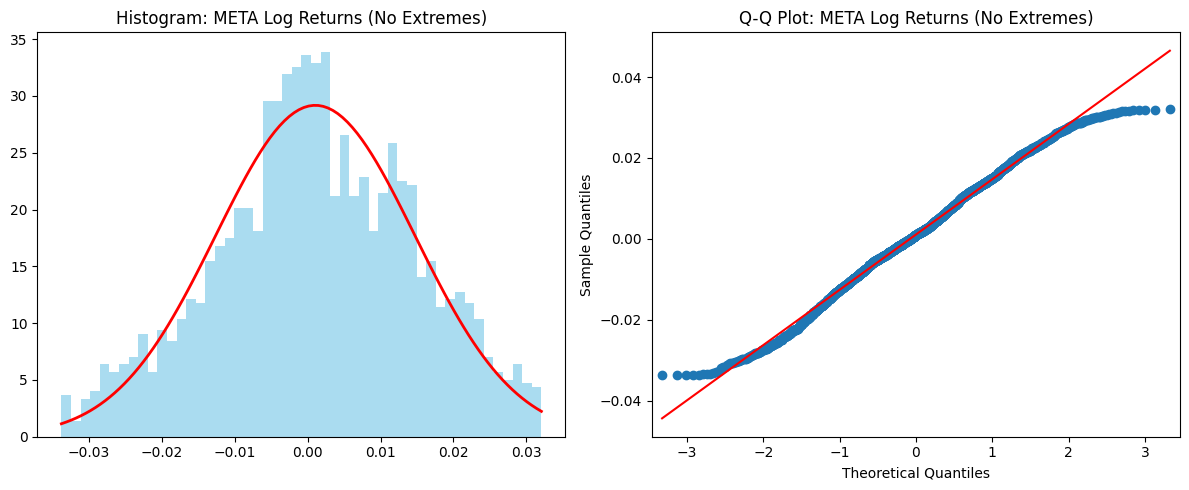


--- TSLA (extremes removed) ---
Shapiro-Wilk: stat=0.9942, p=0.0000
Anderson-Darling: stat=1.3876
D'Agostino-Pearson: stat=18.6159, p=0.0001
Kolmogorov-Smirnov: stat=0.0179, p=0.4594


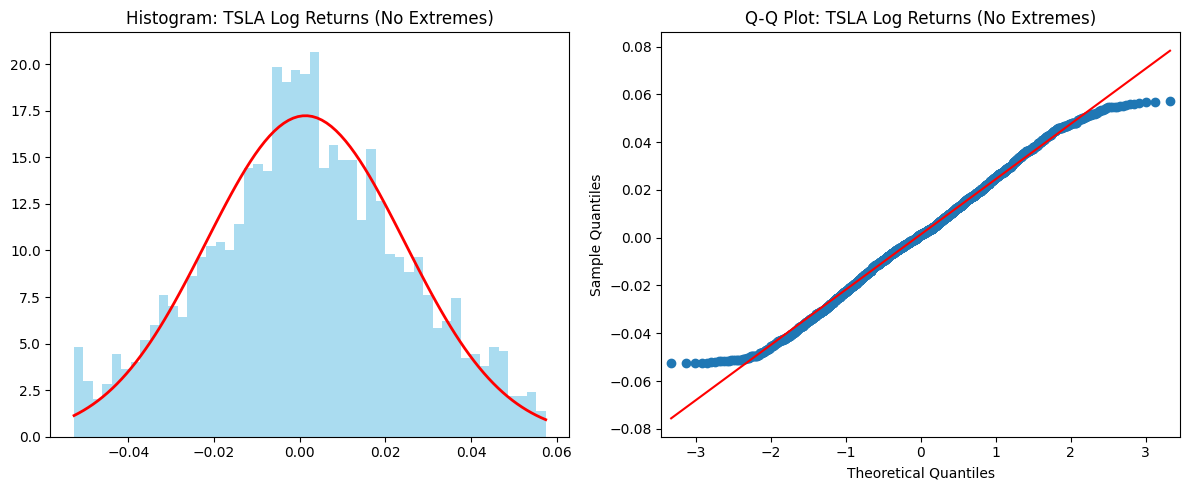


--- JPM (extremes removed) ---
Shapiro-Wilk: stat=0.9948, p=0.0000
Anderson-Darling: stat=1.1347
D'Agostino-Pearson: stat=15.6343, p=0.0004
Kolmogorov-Smirnov: stat=0.0166, p=0.5526


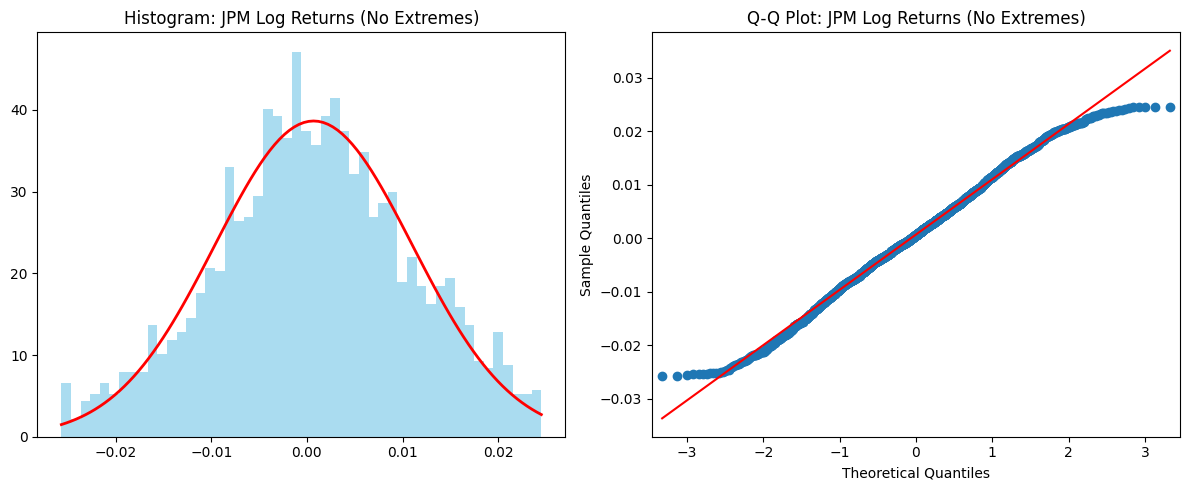


--- NVDA (extremes removed) ---
Shapiro-Wilk: stat=0.9942, p=0.0000
Anderson-Darling: stat=1.1597
D'Agostino-Pearson: stat=18.1879, p=0.0001
Kolmogorov-Smirnov: stat=0.0152, p=0.6680


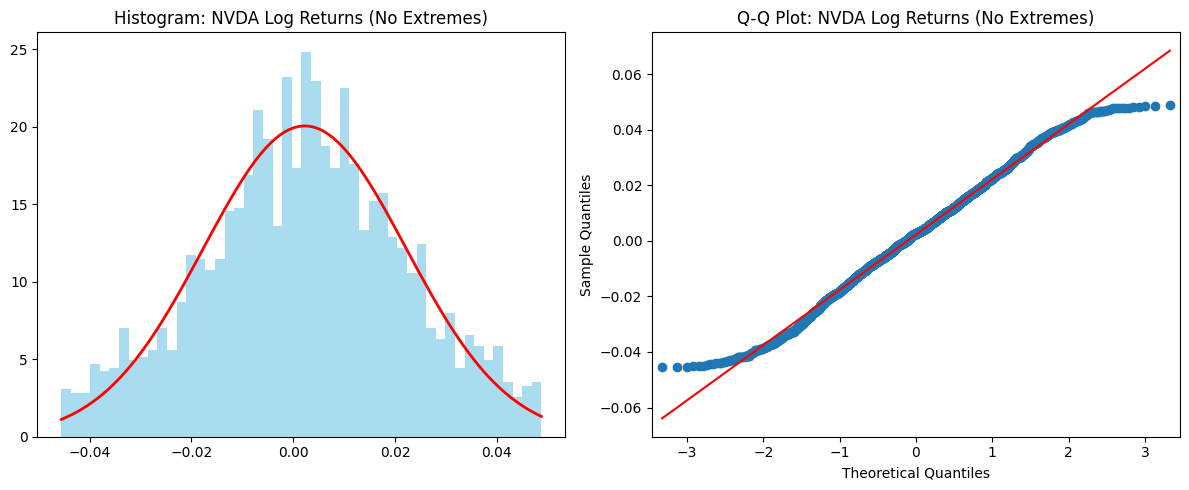


--- SPY (extremes removed) ---
Shapiro-Wilk: stat=0.9906, p=0.0000
Anderson-Darling: stat=4.3171
D'Agostino-Pearson: stat=10.7541, p=0.0046
Kolmogorov-Smirnov: stat=0.0367, p=0.0044


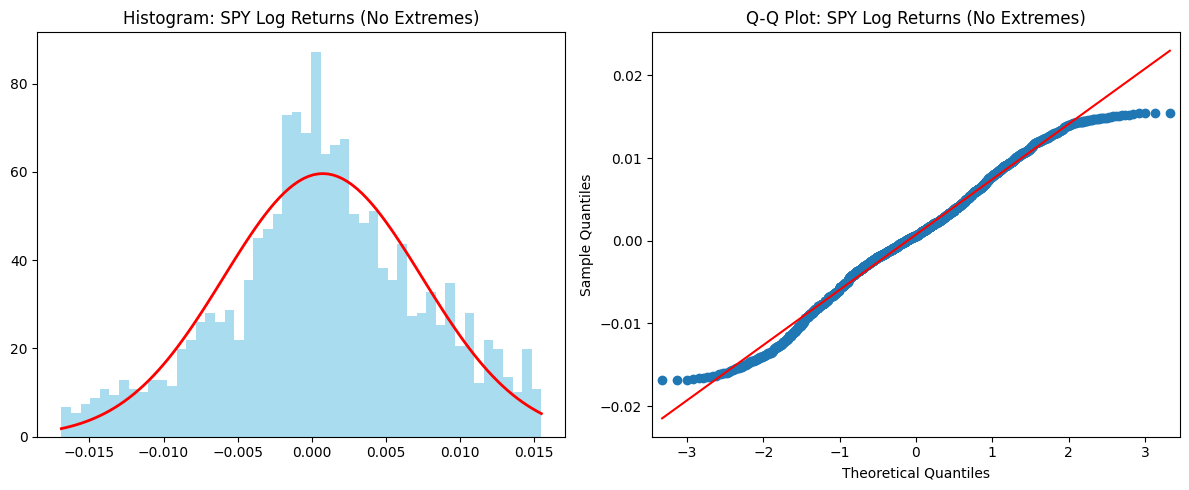


--- QQQ (extremes removed) ---
Shapiro-Wilk: stat=0.9899, p=0.0000
Anderson-Darling: stat=4.7959
D'Agostino-Pearson: stat=24.9546, p=0.0000
Kolmogorov-Smirnov: stat=0.0383, p=0.0025


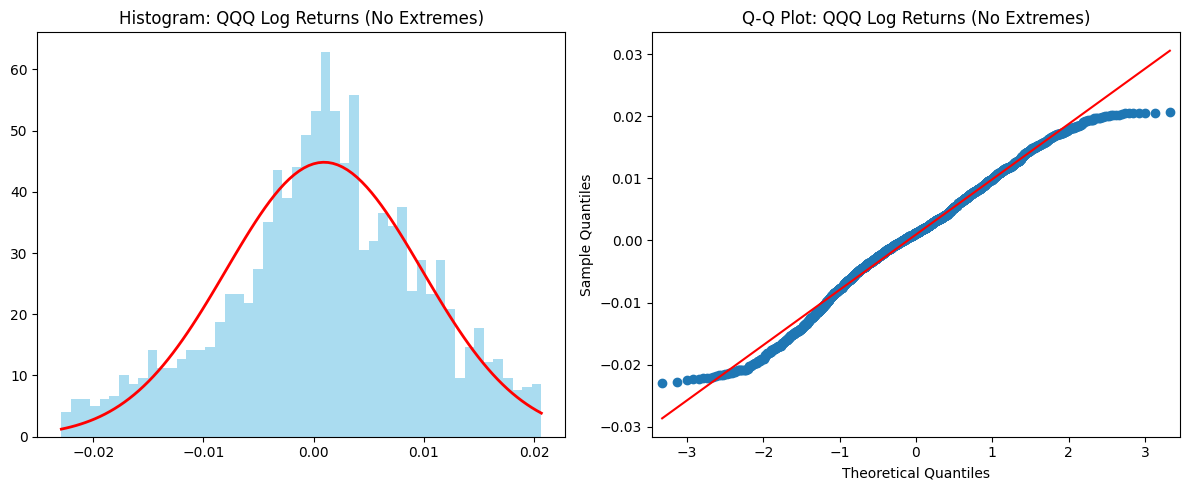

In [6]:
# Q2: Remove extremes and retest for normality
OUTLIER_PERCENTILE = 0.05  # Remove top/bottom 1% for outlier analysis
print("\nNormality after removing extremes:")
for ticker in STOCKS:
    filtered = remove_extremes(log_returns[ticker], OUTLIER_PERCENTILE)
    print(f"\n--- {ticker} (extremes removed) ---")
    normality_tests(filtered)
    plot_distribution(filtered, f"{ticker} Log Returns (No Extremes)")

## Zooming in on 2022-2025

In [7]:
STOCKS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'JPM', 'NVDA', 'SPY', 'QQQ']
START_DATE = '2022-11-01'
END_DATE = '2023-11-01'
ROLLING_WINDOW = 252  # 1 year of trading days
OUTLIER_PERCENTILE = 0.01  # Remove top/bottom 1% for outlier analysis
PORTFOLIO_WEIGHTS = {'AAPL': 0.2, 'MSFT': 0.2, 'GOOGL': 0.2, 'AMZN': 0.2, 'META': 0.2}  # Example portfolio

In [8]:
# STOCKS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'JPM', 'NVDA', 'SPY', 'QQQ']
print("Downloading data for 2022-2025 only...")
prices_2022_2025 = download_data(STOCKS, START_DATE, END_DATE)
log_returns_2022_2025 = compute_log_returns(prices)

[**********            20%                       ]  2 of 10 completed

[*********************100%***********************]  10 of 10 completed



Normality after removing extremes:

--- AAPL (extremes removed) ---
Shapiro-Wilk: stat=0.9928, p=0.0000
Anderson-Darling: stat=1.9460
D'Agostino-Pearson: stat=17.9135, p=0.0001
Kolmogorov-Smirnov: stat=0.0210, p=0.2660


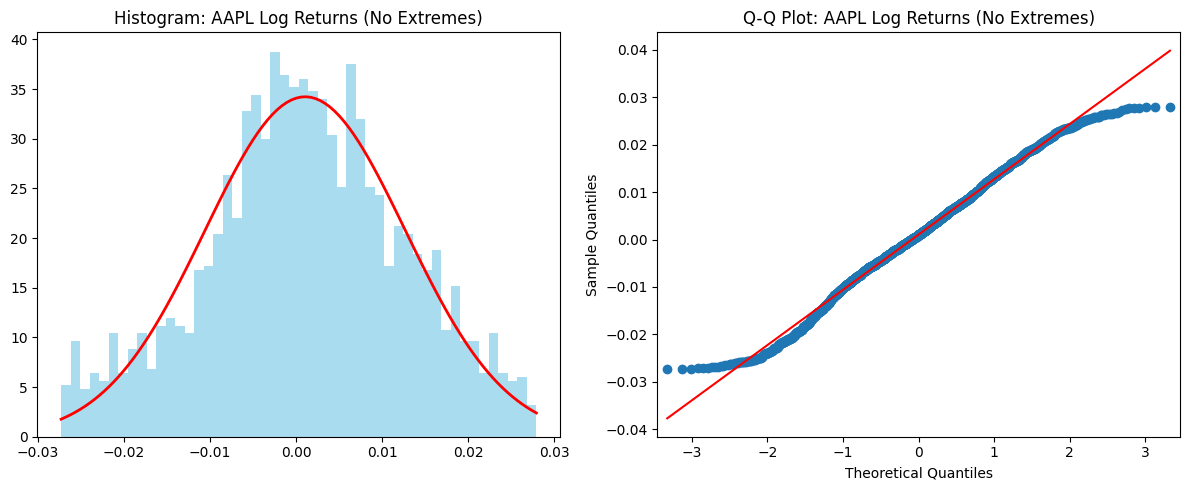


--- MSFT (extremes removed) ---
Shapiro-Wilk: stat=0.9924, p=0.0000
Anderson-Darling: stat=2.3144
D'Agostino-Pearson: stat=18.4311, p=0.0001
Kolmogorov-Smirnov: stat=0.0230, p=0.1785


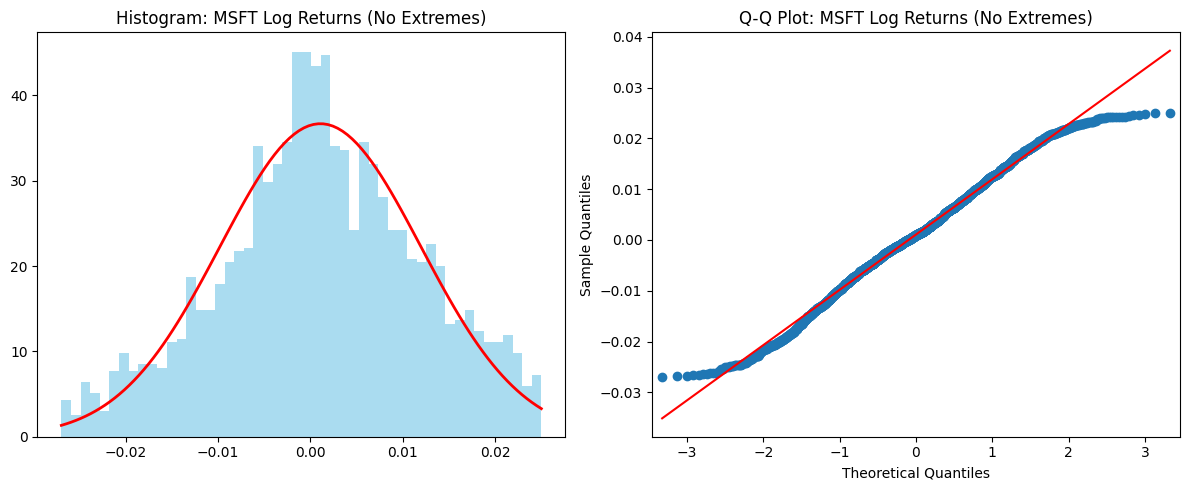


--- GOOGL (extremes removed) ---
Shapiro-Wilk: stat=0.9908, p=0.0000
Anderson-Darling: stat=3.1972
D'Agostino-Pearson: stat=30.0170, p=0.0000
Kolmogorov-Smirnov: stat=0.0290, p=0.0435


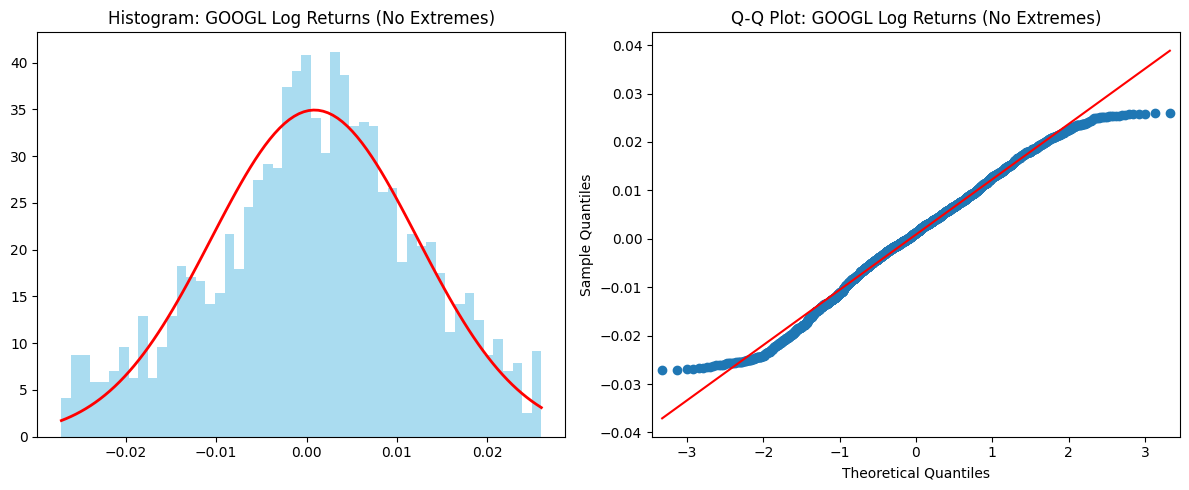


--- AMZN (extremes removed) ---
Shapiro-Wilk: stat=0.9948, p=0.0000
Anderson-Darling: stat=0.9677
D'Agostino-Pearson: stat=19.2358, p=0.0001
Kolmogorov-Smirnov: stat=0.0135, p=0.7996


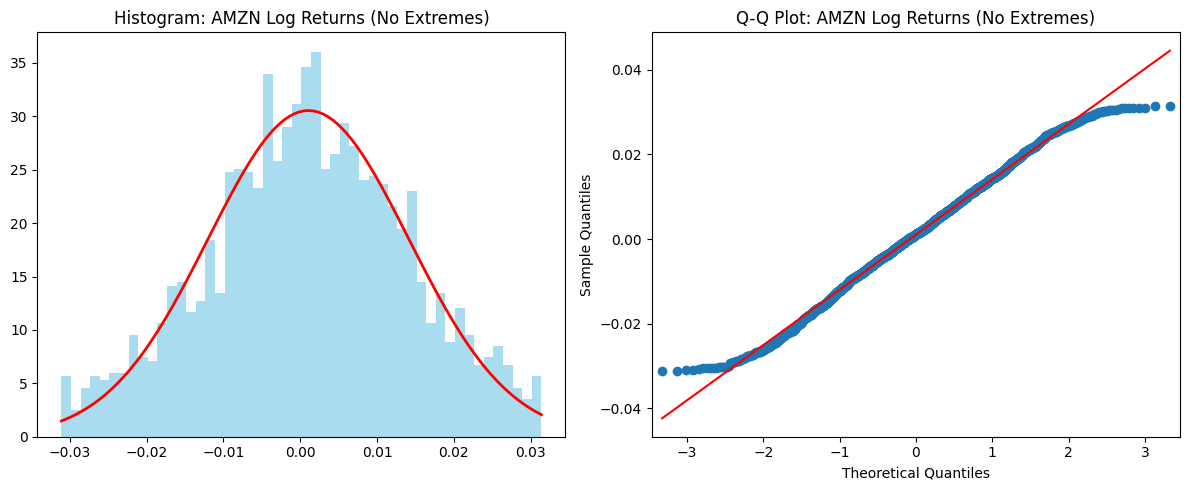


--- META (extremes removed) ---
Shapiro-Wilk: stat=0.9937, p=0.0000
Anderson-Darling: stat=1.8449
D'Agostino-Pearson: stat=23.2360, p=0.0000
Kolmogorov-Smirnov: stat=0.0218, p=0.2277


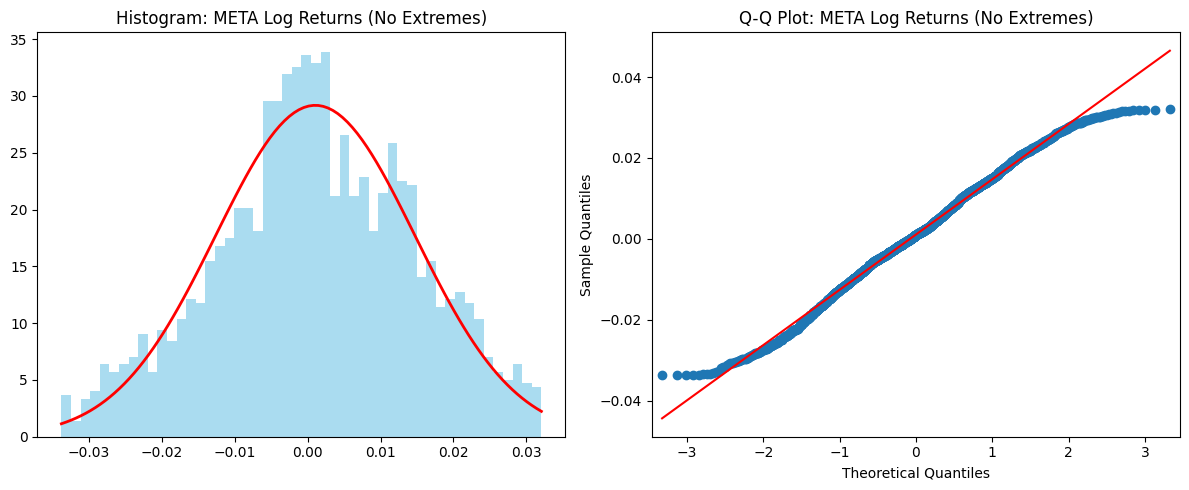


--- TSLA (extremes removed) ---
Shapiro-Wilk: stat=0.9942, p=0.0000
Anderson-Darling: stat=1.3876
D'Agostino-Pearson: stat=18.6159, p=0.0001
Kolmogorov-Smirnov: stat=0.0179, p=0.4594


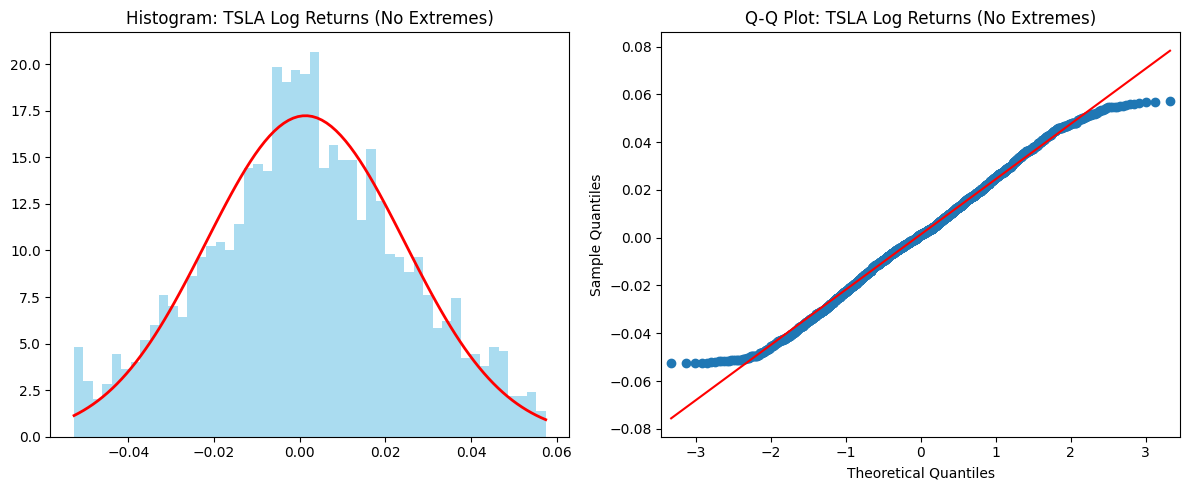


--- JPM (extremes removed) ---
Shapiro-Wilk: stat=0.9948, p=0.0000
Anderson-Darling: stat=1.1347
D'Agostino-Pearson: stat=15.6343, p=0.0004
Kolmogorov-Smirnov: stat=0.0166, p=0.5526


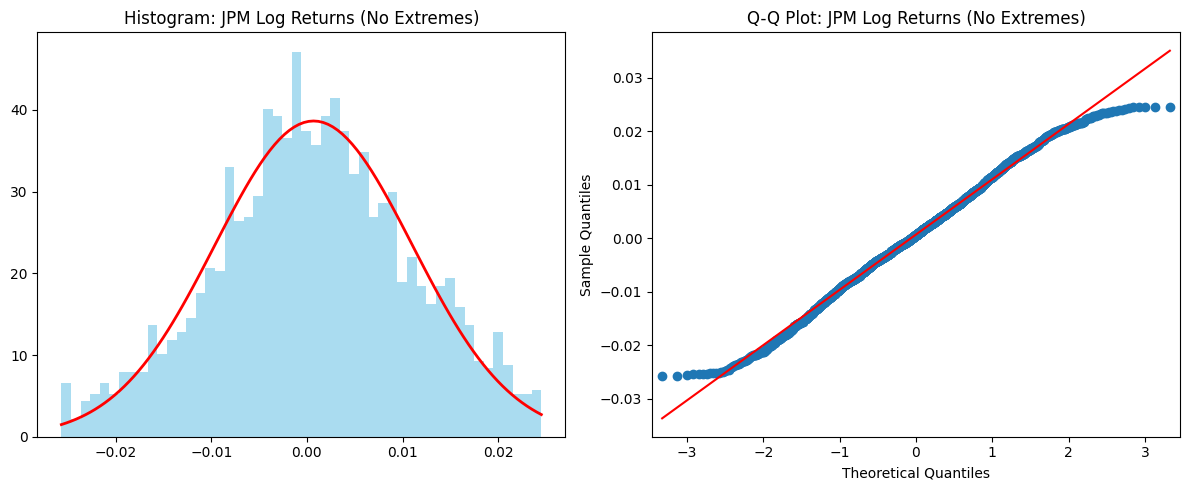


--- NVDA (extremes removed) ---
Shapiro-Wilk: stat=0.9942, p=0.0000
Anderson-Darling: stat=1.1597
D'Agostino-Pearson: stat=18.1879, p=0.0001
Kolmogorov-Smirnov: stat=0.0152, p=0.6680


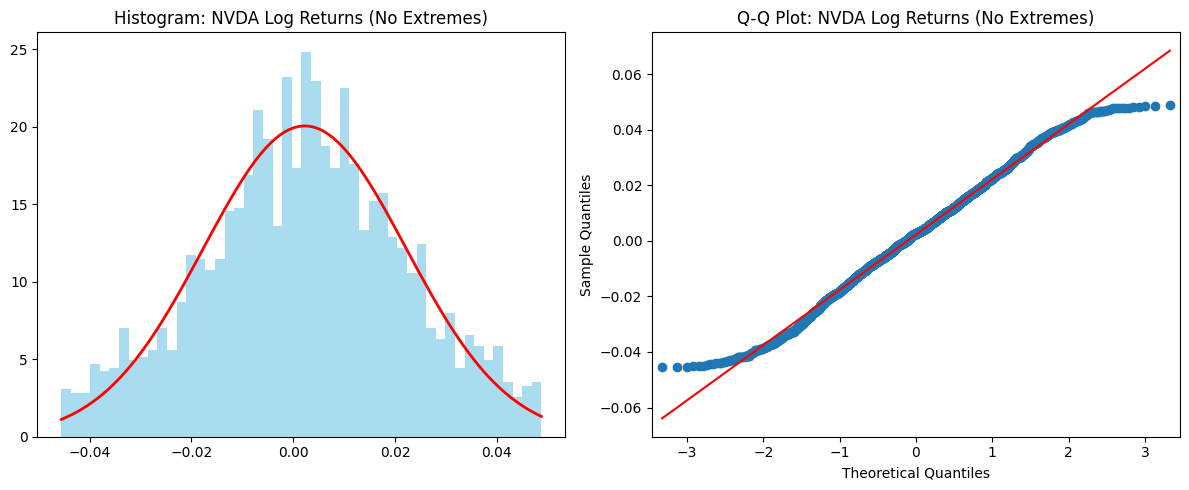


--- SPY (extremes removed) ---
Shapiro-Wilk: stat=0.9906, p=0.0000
Anderson-Darling: stat=4.3171
D'Agostino-Pearson: stat=10.7541, p=0.0046
Kolmogorov-Smirnov: stat=0.0367, p=0.0044


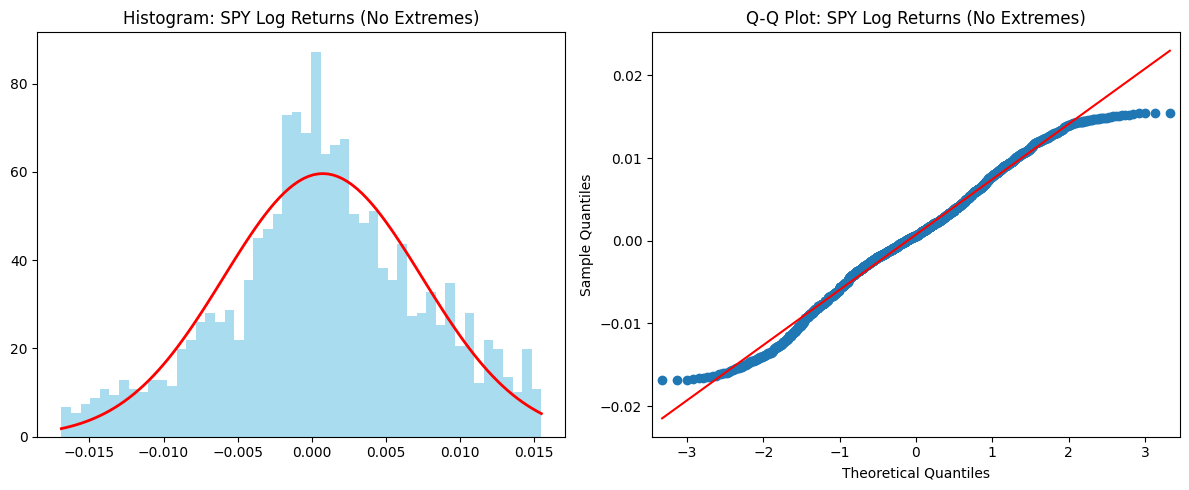


--- QQQ (extremes removed) ---
Shapiro-Wilk: stat=0.9899, p=0.0000
Anderson-Darling: stat=4.7959
D'Agostino-Pearson: stat=24.9546, p=0.0000
Kolmogorov-Smirnov: stat=0.0383, p=0.0025


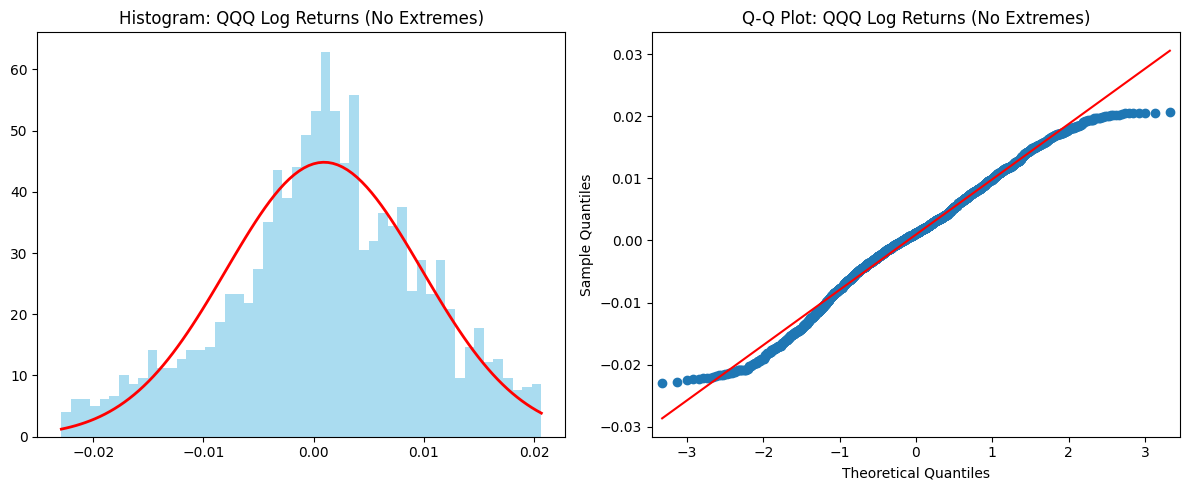

In [9]:
# Q2: Remove extremes and retest for normality
OUTLIER_PERCENTILE = 0.05  # Remove top/bottom 1% for outlier analysis
print("\nNormality after removing extremes:")
for ticker in STOCKS:
    filtered = remove_extremes(log_returns_2022_2025[ticker], OUTLIER_PERCENTILE)
    print(f"\n--- {ticker} (extremes removed) ---")
    normality_tests(filtered)
    plot_distribution(filtered, f"{ticker} Log Returns (No Extremes)")

# Create a personalized portfolio of stocks with historical log return data that is normally distributed.

## Codebase for this problem

In [2]:
# --- CONFIGURATION ---
STOCKS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'JPM', 'NVDA', 'SPY', 'QQQ']
START_DATE = '2015-01-01'
END_DATE = '2025-01-01'
ROLLING_WINDOW = 252
P_THRESHOLD = 0.05
MIN_STOCKS = 5

# --- DATA DOWNLOAD & LOG RETURNS ---
def download_data(tickers, start, end):
    raw = yf.download(tickers, start=start, end=end)
    if 'Adj Close' in raw.columns:
        data = raw['Adj Close']
    else:
        data = raw['Close']
    return data

def compute_log_returns(prices):
    return np.log(prices / prices.shift(1)).dropna()

# --- ROLLING NORMALITY WINDOWS ---
def rolling_shapiro(series, window=252):
    pvals = []
    for i in range(window, len(series)):
        window_data = series.iloc[i-window:i]
        _, p = shapiro(window_data)
        pvals.append(p)
    return pd.Series(pvals, index=series.index[window:])

def find_largest_normal_window(windows_dict, min_stocks=5):
    all_dates = pd.date_range(START_DATE, END_DATE)
    normal_matrix = pd.DataFrame(False, index=all_dates, columns=windows_dict.keys())
    for stock, winlist in windows_dict.items():
        for start, end in winlist:
            normal_matrix.loc[start:end, stock] = True
    stock_sets = normal_matrix.apply(lambda row: frozenset(row.index[row]), axis=1)
    max_len = 0
    best_window = None
    current_stocks = None
    current_start = None
    for date, stocks in stock_sets.items():
        if len(stocks) >= min_stocks:
            if current_stocks == stocks:
                current_end = date
            else:
                if current_stocks is not None:
                    window_len = (current_end - current_start).days + 1
                    if window_len > max_len:
                        max_len = window_len
                        best_window = (current_start, current_end, current_stocks)
                current_start = date
                current_end = date
                current_stocks = stocks
        else:
            if current_stocks is not None:
                window_len = (current_end - current_start).days + 1
                if window_len > max_len:
                    max_len = window_len
                    best_window = (current_start, current_end, current_stocks)
                current_stocks = None
                current_start = None
                current_end = None
    if current_stocks is not None:
        window_len = (current_end - current_start).days + 1
        if window_len > max_len:
            max_len = window_len
            best_window = (current_start, current_end, current_stocks)
    return best_window

def find_normal_windows(pvals, threshold=0.05, min_length=10):
    normal = pvals > threshold
    windows = []
    start = None
    for idx, val in normal.items():
        if val and start is None:
            start = idx
        elif not val and start is not None:
            end = prev_idx
            if (end - start).days >= min_length:
                windows.append((start, end))
            start = None
        prev_idx = idx
    if start is not None and (pvals.index[-1] - start).days >= min_length:
        windows.append((start, pvals.index[-1]))
    return windows

# --- NORMALITY TESTS & PLOTS ---
def normality_tests(series):
    results = {}
    stat, p = shapiro(series)
    results['Shapiro-Wilk'] = (stat, p)
    ad = anderson(series, dist='norm')
    results['Anderson-Darling'] = (ad.statistic, ad.critical_values, ad.significance_level)
    stat, p = normaltest(series)
    results["D'Agostino-Pearson"] = (stat, p)
    stat, p = kstest(series, 'norm', args=(series.mean(), series.std()))
    results['Kolmogorov-Smirnov'] = (stat, p)
    return results

def plot_distribution(series, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.hist(series, bins=50, alpha=0.7, color='skyblue', density=True)
    x = np.linspace(series.min(), series.max(), 100)
    plt.plot(x, norm.pdf(x, series.mean(), series.std()), 'r-', lw=2)
    plt.title(f"Histogram: {title}")
    plt.subplot(1,2,2)
    qqplot(series, line='s', ax=plt.gca())
    plt.title(f"Q-Q Plot: {title}")
    plt.tight_layout()
    plt.show()

# --- Plot rolling Shapiro-Wilk p-values for any series ---
def plot_rolling_shapiro(series, window=20, title=None):
    if len(series) < window:
        print(f"Not enough data points to plot rolling Shapiro-Wilk p-values (need at least {window}).")
        return
    pvals = []
    idxs = []
    for i in range(window, len(series)):
        window_data = series.iloc[i-window:i]
        _, p = shapiro(window_data)
        pvals.append(p)
        idxs.append(series.index[i])
    plt.figure(figsize=(10,4))
    plt.plot(idxs, pvals, label='Rolling Shapiro-Wilk p-value')
    plt.axhline(0.05, color='red', linestyle='--', label='p=0.05')
    plt.title(title or f'Rolling Shapiro-Wilk p-values (window={window})')
    plt.xlabel('Date')
    plt.ylabel('p-value')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Continue with the portfolio normality analysis

In [3]:
print("Downloading data...")
prices = download_data(STOCKS, START_DATE, END_DATE)
log_returns = compute_log_returns(prices)

/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_14349/934876584.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(tickers, start=start, end=end)
[*********************100%***********************]  10 of 10 completed


In [4]:
# Find normal windows for each stock
print("Finding normal windows for each stock...")
normal_windows = {}
for ticker in STOCKS:
    pvals = rolling_shapiro(log_returns[ticker], window=ROLLING_WINDOW)
    windows = find_normal_windows(pvals, threshold=P_THRESHOLD)
    normal_windows[ticker] = windows

Finding normal windows for each stock...


In [5]:
normal_windows

{'AAPL': [(Timestamp('2021-09-09 00:00:00'), Timestamp('2021-10-07 00:00:00')),
  (Timestamp('2021-10-13 00:00:00'), Timestamp('2021-10-27 00:00:00')),
  (Timestamp('2021-10-29 00:00:00'), Timestamp('2022-01-28 00:00:00')),
  (Timestamp('2022-04-29 00:00:00'), Timestamp('2022-05-11 00:00:00')),
  (Timestamp('2022-07-01 00:00:00'), Timestamp('2022-07-21 00:00:00')),
  (Timestamp('2022-07-25 00:00:00'), Timestamp('2022-11-10 00:00:00')),
  (Timestamp('2022-12-30 00:00:00'), Timestamp('2023-03-15 00:00:00'))],
 'MSFT': [(Timestamp('2021-11-11 00:00:00'), Timestamp('2022-01-03 00:00:00')),
  (Timestamp('2022-09-14 00:00:00'), Timestamp('2023-04-26 00:00:00')),
  (Timestamp('2023-12-04 00:00:00'), Timestamp('2023-12-22 00:00:00')),
  (Timestamp('2024-04-29 00:00:00'), Timestamp('2024-06-17 00:00:00'))],
 'GOOGL': [(Timestamp('2022-09-02 00:00:00'),
   Timestamp('2022-10-26 00:00:00')),
  (Timestamp('2022-11-16 00:00:00'), Timestamp('2022-12-07 00:00:00')),
  (Timestamp('2022-12-12 00:00:00'

In [6]:
# Find the largest window with at least MIN_STOCKS stocks normal
print(f"Searching for largest window with at least {MIN_STOCKS} stocks normal...")
best_window = find_largest_normal_window(normal_windows, min_stocks=MIN_STOCKS)
if best_window is None:
    print("No such window found.")
else:
    print("Normal windows found!")

Searching for largest window with at least 5 stocks normal...
Normal windows found!


In [7]:
start, end, stocks = best_window
print(f"Largest window: {start.date()} to {end.date()} ({(end-start).days+1} days)")
print(f"Stocks: {', '.join(stocks)}")

Largest window: 2023-01-04 to 2023-02-28 (56 days)
Stocks: JPM, SPY, GOOGL, NVDA, AAPL, MSFT, QQQ


In [8]:
# Build equal-weighted portfolio for this window
period = log_returns.index[(log_returns.index >= start) & (log_returns.index <= end)]
overlap_returns = log_returns.loc[period, list(stocks)]
if len(overlap_returns) < 3:
    print(f"Not enough data points ({len(overlap_returns)}) to perform normality tests for this period.")

In [9]:
weights = {t: 1/len(stocks) for t in stocks}
port_lr = overlap_returns.dot(np.array(list(weights.values())))


Normality tests for equal-weighted portfolio from 2023-01-04 to 2023-02-28:
  Shapiro-Wilk: stat=0.9720, p=0.4473
  Anderson-Darling: stat=0.2662
  D'Agostino-Pearson: stat=3.6089, p=0.1646
  Kolmogorov-Smirnov: stat=0.0904, p=0.8877


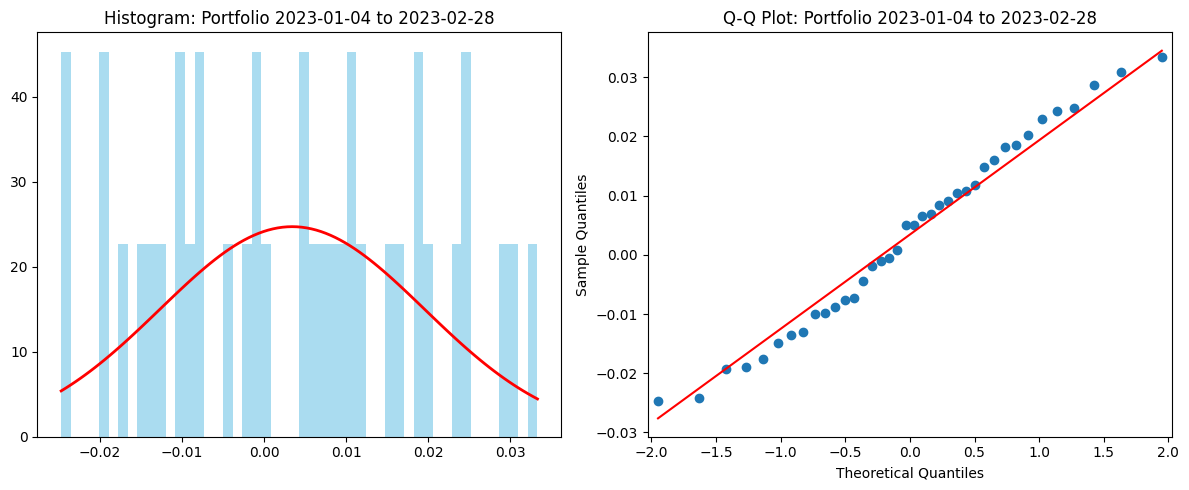

In [10]:
# Normality tests
print(f"\nNormality tests for equal-weighted portfolio from {start.date()} to {end.date()}:")
results = normality_tests(port_lr)
for test, res in results.items():
    if isinstance(res, tuple):
        print(f"  {test}: stat={res[0]:.4f}, p={res[1]:.4f}" if len(res)==2 else f"  {test}: stat={res[0]:.4f}")
    else:
        print(f"  {test}: {res}")
plot_distribution(port_lr, f"Portfolio {start.date()} to {end.date()}")

We see that all four tests are passed by this portfolio! 


Plotting rolling Shapiro-Wilk p-values for the portfolio window...


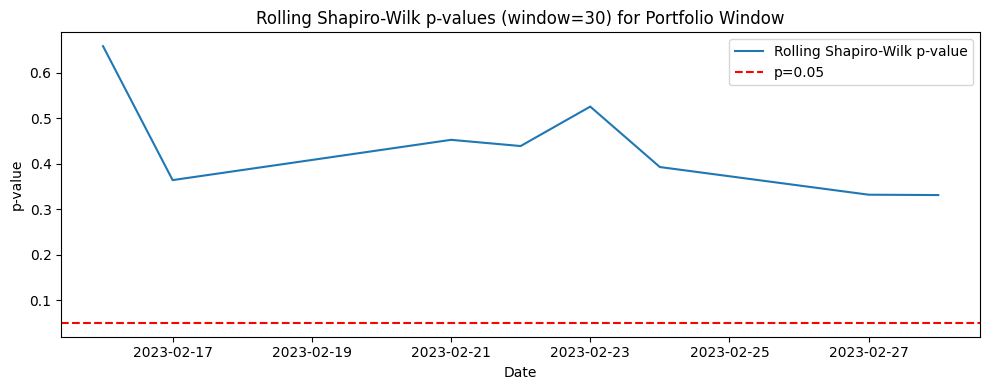


Plotting rolling Shapiro-Wilk p-values for the entire date range...


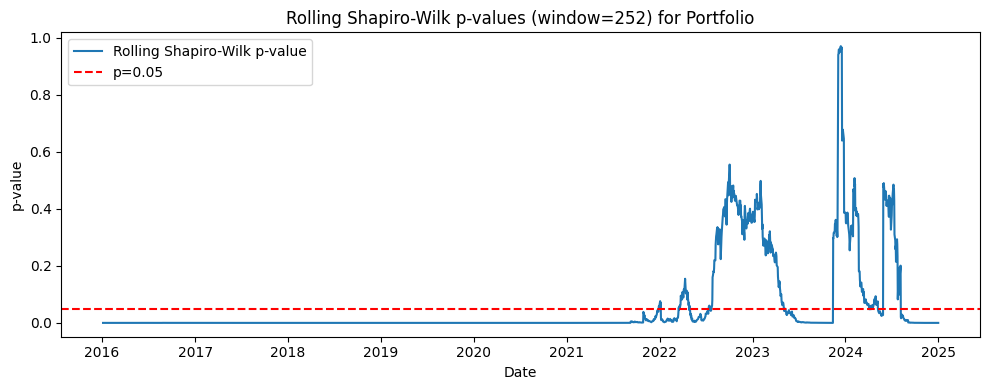

In [12]:
# Plot rolling Shapiro-Wilk p-values for the portfolio window
print("\nPlotting rolling Shapiro-Wilk p-values for the portfolio window...")
roll_window = min(30, len(port_lr))
plot_rolling_shapiro(port_lr, window=roll_window, title=f'Rolling Shapiro-Wilk p-values (window={roll_window}) for Portfolio Window')

# Plot rolling Shapiro-Wilk p-values for the entire date range
print("\nPlotting rolling Shapiro-Wilk p-values for the entire date range...")
# Build equal-weighted portfolio for the entire period (using all stocks)
available_stocks = [s for s in stocks if s in log_returns.columns]
all_weights = {t: 1/len(available_stocks) for t in available_stocks}
full_port_lr = log_returns[available_stocks].dot(np.array(list(all_weights.values())))
plot_rolling_shapiro(full_port_lr, window=252, title='Rolling Shapiro-Wilk p-values (window=252) for Portfolio')

# Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.

## Portfolio weight from project 1

In [15]:
D_L_low_risk = {'AAPL': 0.010000000000423425,
 'MSFT': 0.01221572463533374,
 'GOOGL': 0.01033034588811007,
 'AMZN': 0.010000000000022805,
 'META': 0.010000000002468881,
 'JPM': 0.010000000000526811,
 'BAC': 0.010000000000268327,
 'GS': 0.010000000001257421,
 'MS': 0.010000000000520638,
 'WFC': 0.010000000000597899,
 'JNJ': 0.2016135026575735,
 'PFE': 0.010000000000534654,
 'MRK': 0.10833251500602722,
 'UNH': 0.024796621787958828,
 'ABBV': 0.04250055981467315,
 'XOM': 0.0271117092391955,
 'CVX': 0.05185666456254941,
 'COP': 0.010000000001247195,
 'SLB': 0.010000000000072016,
 'EOG': 0.01000000000013542,
 'PG': 0.08675659318876135,
 'KO': 0.14025092796669764,
 'PEP': 0.05103028986748353,
 'WMT': 0.11320454543520699,
 'COST': 0.010000000001427513}

D_LS_low_risk = {'AAPL': -0.02081858920256607,
 'MSFT': 0.05866805654179619,
 'GOOGL': 0.03790206574219404,
 'AMZN': -0.014968375358708574,
 'META': 0.0018408847253588991,
 'JPM': 0.043701598175981966,
 'BAC': -0.07989820143233331,
 'GS': 0.03710043596405984,
 'MS': 0.005473660004890947,
 'WFC': 0.027216573495038743,
 'JNJ': 0.199999999999977,
 'PFE': -0.0035307741278841898,
 'MRK': 0.10907928115334357,
 'UNH': 0.027814491331880895,
 'ABBV': 0.03965856929413216,
 'XOM': 0.07811786418268611,
 'CVX': 0.09553039414695252,
 'COP': -0.04703400984602338,
 'SLB': 0.0017523756785086417,
 'EOG': 0.0006668873134590429,
 'PG': 0.0906040511820125,
 'KO': 0.1627808365945272,
 'PEP': 0.042118251482545235,
 'WMT': 0.13073382658276053,
 'COST': -0.02451015371353382}

D_L_high_risk = {'AAPL': 0.010000000000000134,
 'MSFT': 0.01,
 'GOOGL': 0.01,
 'AMZN': 0.010000000000000035,
 'META': 0.4336718782857487,
 'JPM': 0.01,
 'BAC': 0.010000000000000163,
 'GS': 0.01,
 'MS': 0.010000000000000057,
 'WFC': 0.01,
 'JNJ': 0.010000000000000286,
 'PFE': 0.010000000000000054,
 'MRK': 0.010000000000000037,
 'UNH': 0.01,
 'ABBV': 0.010000000000000064,
 'XOM': 0.18085522397452788,
 'CVX': 0.010000000000000293,
 'COP': 0.01,
 'SLB': 0.01,
 'EOG': 0.01,
 'PG': 0.010000000000000205,
 'KO': 0.01,
 'PEP': 0.010000000000000155,
 'WMT': 0.16547289773972346,
 'COST': 0.01}

D_LS_high_risk = {
    'AAPL': 0.1119624198605994,
    'MSFT': -0.037404209947809824,
    'GOOGL': -0.009148040171557393,
    'AMZN': -0.023141450094666016,
    'META': 0.2,
    'JPM': 0.2,
    'BAC': -0.2,
    'GS': 0.1856083692997834,
    'MS': 0.018863921647539632,
    'WFC': 0.19632780689073875,
    'JNJ': -0.2,
    'PFE': -0.2,
    'MRK': 0.2,
    'UNH': -0.10454387908274561,
    'ABBV': 0.2,
    'XOM': 0.2,
    'CVX': -0.022767047636326393,
    'COP': 0.08500466704197629,
    'SLB': -0.012984226757752775,
    'EOG': 0.13930475823528363,
    'PG': -0.08259146925970438,
    'KO': -0.04449162002535831,
    'PEP': -0.2,
    'WMT': 0.2,
    'COST': 0.2
}

Tech_L_low_risk = {'AAPL': 0.021812453802044388,
 'MSFT': 0.010000000000000009,
 'GOOGL': 0.01,
 'AMZN': 0.010000000000000005,
 'META': 0.010000000000000004,
 'NVDA': 0.010000000006475891,
 'TSLA': 0.010000000000000005,
 'ADBE': 0.01,
 'CRM': 0.010000000000660708,
 'ORCL': 0.03139380706833694,
 'INTC': 0.01,
 'AMD': 0.010000000013316008,
 'AVGO': 0.010000000000000002,
 'QCOM': 0.01,
 'CSCO': 0.2650769281607079,
 'IBM': 0.4810085979380693,
 'TXN': 0.010000000000000002,
 'AMAT': 0.010000000008569309,
 'NOW': 0.010000000000000002,
 'SHOP': 0.01000000000676366,
 'UBER': 0.010000000001539899,
 'SNOW': 0.010000000000000005,
 'ZM': 0.010000000000000005,
 'DOCU': 0.010000000002015539,
 'PYPL': 0.01000000000000001,
 'NFLX': 0.01000000000000001}

Tech_LS_low_risk = {'AAPL': 0.17210553372057874,
 'MSFT': 0.19999999999999948,
 'GOOGL': 0.07617976042632175,
 'AMZN': -0.013563717692230927,
 'META': -0.044067202606241695,
 'NVDA': -0.08123319609124961,
 'TSLA': -0.012931297455996835,
 'ADBE': -0.011675000715674753,
 'CRM': 0.04676128568806629,
 'ORCL': 0.13497283036307053,
 'INTC': -0.008985392704690787,
 'AMD': -0.06083042569540365,
 'AVGO': 0.030598811714695404,
 'QCOM': -0.027165699245987638,
 'CSCO': 0.19999999999999957,
 'IBM': 0.19999999999999973,
 'TXN': 0.19999999999999962,
 'AMAT': -0.049477630452988246,
 'NOW': -0.039573504926120204,
 'SHOP': -0.04997514714909841,
 'UBER': 0.07414305340299125,
 'SNOW': -0.014841654989623188,
 'ZM': 0.02546538842827643,
 'DOCU': -0.055269051211160526,
 'PYPL': 0.048038262736871444,
 'NFLX': 0.061323994477113744}

Tech_L_high_risk = {'AAPL': 0.010000000000000142,
 'MSFT': 0.01,
 'GOOGL': 0.010000000000000132,
 'AMZN': 0.01,
 'META': 0.01,
 'NVDA': 0.11626076731695126,
 'TSLA': 0.01,
 'ADBE': 0.01,
 'CRM': 0.01,
 'ORCL': 0.0803258864424402,
 'INTC': 0.01,
 'AMD': 0.010000000000000023,
 'AVGO': 0.22440016727373968,
 'QCOM': 0.01000000000000016,
 'CSCO': 0.010000000000000071,
 'IBM': 0.3590131789668684,
 'TXN': 0.010000000000000099,
 'AMAT': 0.01000000000000019,
 'NOW': 0.01,
 'SHOP': 0.010000000000000092,
 'UBER': 0.01,
 'SNOW': 0.01000000000000016,
 'ZM': 0.010000000000000368,
 'DOCU': 0.010000000000000007,
 'PYPL': 0.010000000000000212,
 'NFLX': 0.01000000000000003}

Tech_LS_high_risk = {'AAPL': 0.2,
 'MSFT': 0.07943172620280746,
 'GOOGL': 0.10177491129918559,
 'AMZN': 0.021739749318436932,
 'META': 0.09380887112482013,
 'NVDA': 0.19999999999999993,
 'TSLA': 0.03551861269002139,
 'ADBE': -0.19006105377277493,
 'CRM': 0.115436581471451,
 'ORCL': 0.2,
 'INTC': -0.15236959088287885,
 'AMD': -0.19933860180204369,
 'AVGO': 0.2,
 'QCOM': -0.140392912687034,
 'CSCO': 0.2,
 'IBM': 0.2,
 'TXN': 0.2,
 'AMAT': -0.12136133336635185,
 'NOW': 0.12113943159746272,
 'SHOP': -0.004942146965349801,
 'UBER': 0.15558552949751772,
 'SNOW': -0.09841656901136019,
 'ZM': -0.1415822793511692,
 'DOCU': -0.062227613579616516,
 'PYPL': -0.13437355444978785,
 'NFLX': 0.12063024266666338}

In [16]:
START_DATE = '2015-01-01'
END_DATE = '2025-01-01'
ROLLING_WINDOW = 252  # Default window size for rolling Shapiro-Wilk

## Plot Rolling Shapiro-Wilk p-values for basket 1 from first mini-project

/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_14349/934876584.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(tickers, start=start, end=end)
[****                   8%                       ]  2 of 25 completed

[*********************100%***********************]  25 of 25 completed



Plotting rolling Shapiro-Wilk p-values for the long-short portfolio (window=252)...


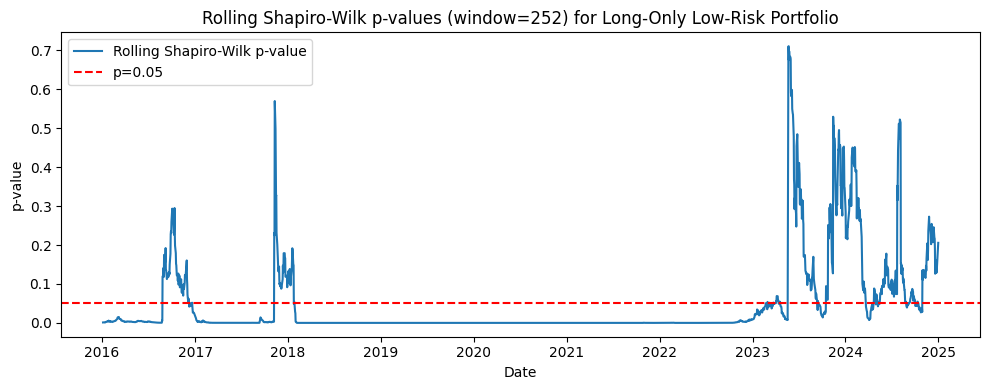


Normality tests for the long-only low-risk portfolio log returns:
  Shapiro-Wilk: stat=0.8628, p=0.0000
  Anderson-Darling: stat=50.8167
  D'Agostino-Pearson: stat=659.3822, p=0.0000
  Kolmogorov-Smirnov: stat=0.0880, p=0.0000

Plotting rolling Shapiro-Wilk p-values for the long-short portfolio (window=252)...


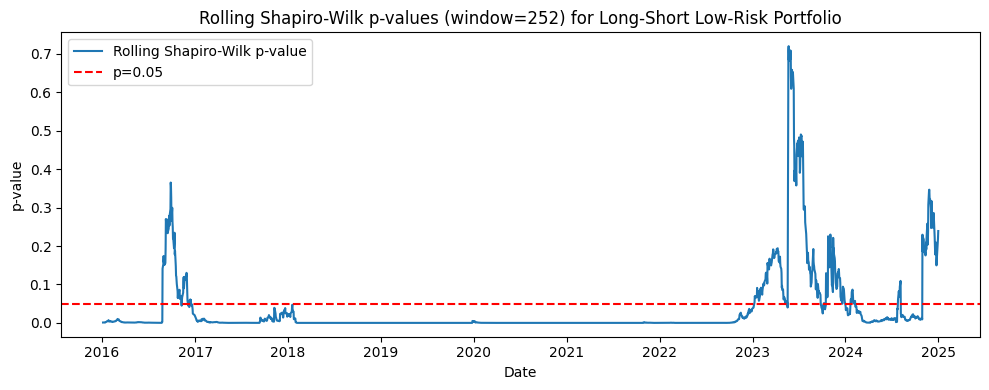


Normality tests for the entire long-short low-risk portfolio log returns:
  Shapiro-Wilk: stat=0.8681, p=0.0000
  Anderson-Darling: stat=47.6203
  D'Agostino-Pearson: stat=629.5746, p=0.0000
  Kolmogorov-Smirnov: stat=0.0874, p=0.0000

Plotting rolling Shapiro-Wilk p-values for the long-short portfolio (window=252)...


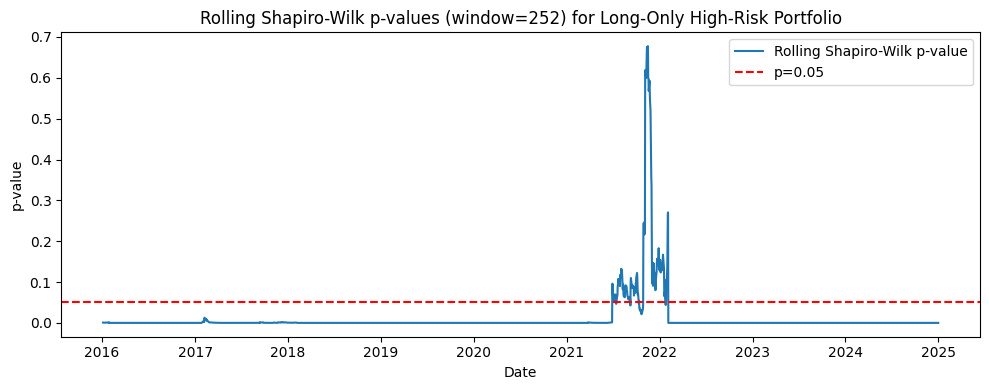


Normality tests for the entire long-only high-risk portfolio log returns:
  Shapiro-Wilk: stat=0.8780, p=0.0000
  Anderson-Darling: stat=45.9632
  D'Agostino-Pearson: stat=816.4602, p=0.0000
  Kolmogorov-Smirnov: stat=0.0866, p=0.0000

Plotting rolling Shapiro-Wilk p-values for the long-short portfolio (window=252)...


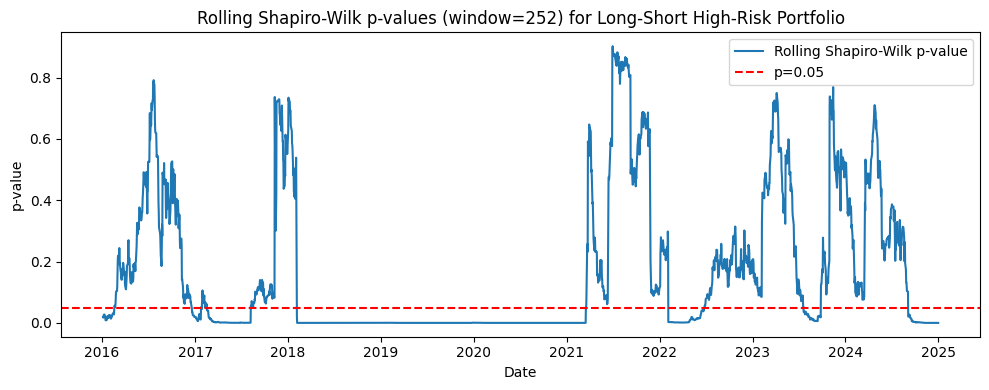


Normality tests for the entire long-short high-risk portfolio log returns:
  Shapiro-Wilk: stat=0.9409, p=0.0000
  Anderson-Darling: stat=19.7054
  D'Agostino-Pearson: stat=543.4561, p=0.0000
  Kolmogorov-Smirnov: stat=0.0639, p=0.0000


In [17]:
# --- CONFIGURATION ---
# D_L_low_risk, D_LS_low_risk, D_L_high_risk, D_LS_high_risk
PORTFOLIO_WEIGHTS = D_L_low_risk
tickers = list(PORTFOLIO_WEIGHTS.keys())
print("Downloading data...")
prices = download_data(tickers, START_DATE, END_DATE)
log_returns = compute_log_returns(prices)

# Align log returns and weights
available = [t for t in tickers if t in log_returns.columns]
weights = np.array([PORTFOLIO_WEIGHTS[t] for t in available])
port_lr = log_returns[available].dot(weights)

# Plot rolling Shapiro-Wilk p-values
print(f"\nPlotting rolling Shapiro-Wilk p-values for the long-short portfolio (window={ROLLING_WINDOW})...")
plot_rolling_shapiro(port_lr, window=ROLLING_WINDOW, title=f'Rolling Shapiro-Wilk p-values (window={ROLLING_WINDOW}) for Long-Only Low-Risk Portfolio')

# Print most recent normality test results
print("\nNormality tests for the long-only low-risk portfolio log returns:")
results = normality_tests(port_lr)
for test, res in results.items():
    if isinstance(res, tuple):
        print(f"  {test}: stat={res[0]:.4f}, p={res[1]:.4f}" if len(res)==2 else f"  {test}: stat={res[0]:.4f}")
    else:
        print(f"  {test}: {res}")

# D_L_low_risk, D_LS_low_risk, D_L_high_risk, D_LS_high_risk
PORTFOLIO_WEIGHTS = D_LS_low_risk
weights = np.array([PORTFOLIO_WEIGHTS[t] for t in available])
port_lr = log_returns[available].dot(weights)

# Plot rolling Shapiro-Wilk p-values
print(f"\nPlotting rolling Shapiro-Wilk p-values for the long-short portfolio (window={ROLLING_WINDOW})...")
plot_rolling_shapiro(port_lr, window=ROLLING_WINDOW, title=f'Rolling Shapiro-Wilk p-values (window={ROLLING_WINDOW}) for Long-Short Low-Risk Portfolio')

# Print most recent normality test results
print("\nNormality tests for the entire long-short low-risk portfolio log returns:")
results = normality_tests(port_lr)
for test, res in results.items():
    if isinstance(res, tuple):
        print(f"  {test}: stat={res[0]:.4f}, p={res[1]:.4f}" if len(res)==2 else f"  {test}: stat={res[0]:.4f}")
    else:
        print(f"  {test}: {res}")

# D_L_low_risk, D_LS_low_risk, D_L_high_risk, D_LS_high_risk
PORTFOLIO_WEIGHTS = D_L_high_risk
weights = np.array([PORTFOLIO_WEIGHTS[t] for t in available])
port_lr = log_returns[available].dot(weights)

# Plot rolling Shapiro-Wilk p-values
print(f"\nPlotting rolling Shapiro-Wilk p-values for the long-short portfolio (window={ROLLING_WINDOW})...")
plot_rolling_shapiro(port_lr, window=ROLLING_WINDOW, title=f'Rolling Shapiro-Wilk p-values (window={ROLLING_WINDOW}) for Long-Only High-Risk Portfolio')

# Print most recent normality test results
print("\nNormality tests for the entire long-only high-risk portfolio log returns:")
results = normality_tests(port_lr)
for test, res in results.items():
    if isinstance(res, tuple):
        print(f"  {test}: stat={res[0]:.4f}, p={res[1]:.4f}" if len(res)==2 else f"  {test}: stat={res[0]:.4f}")
    else:
        print(f"  {test}: {res}")

# D_L_low_risk, D_LS_low_risk, D_L_high_risk, D_LS_high_risk
PORTFOLIO_WEIGHTS = D_LS_high_risk
weights = np.array([PORTFOLIO_WEIGHTS[t] for t in available])
port_lr = log_returns[available].dot(weights)

# Plot rolling Shapiro-Wilk p-values
print(f"\nPlotting rolling Shapiro-Wilk p-values for the long-short portfolio (window={ROLLING_WINDOW})...")
plot_rolling_shapiro(port_lr, window=ROLLING_WINDOW, title=f'Rolling Shapiro-Wilk p-values (window={ROLLING_WINDOW}) for Long-Short High-Risk Portfolio')

# Print most recent normality test results
print("\nNormality tests for the entire long-short high-risk portfolio log returns:")
results = normality_tests(port_lr)
for test, res in results.items():
    if isinstance(res, tuple):
        print(f"  {test}: stat={res[0]:.4f}, p={res[1]:.4f}" if len(res)==2 else f"  {test}: stat={res[0]:.4f}")
    else:
        print(f"  {test}: {res}")

## Plot Rolling Shapiro-Wilk p-values for basket 2 from first mini-project

/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_14349/934876584.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(tickers, start=start, end=end)
[***********           23%                       ]  6 of 26 completed

[*********************100%***********************]  26 of 26 completed



Plotting rolling Shapiro-Wilk p-values for the long-short portfolio (window=252)...


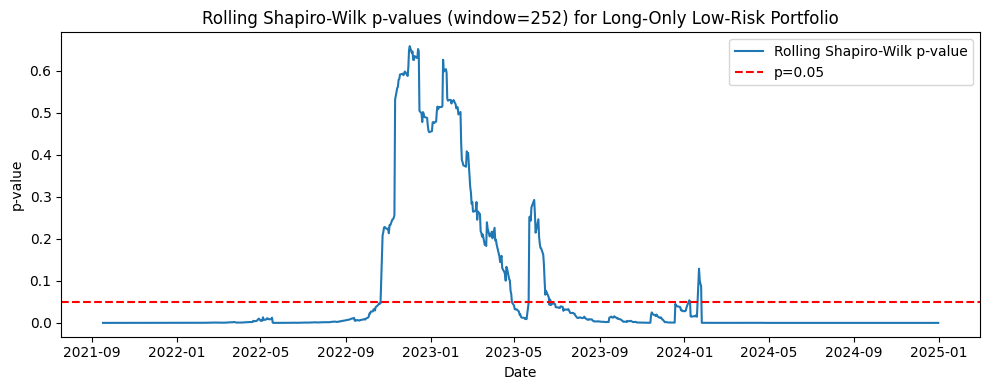


Normality tests for the long-only low-risk portfolio log returns:
  Shapiro-Wilk: stat=0.9774, p=0.0000
  Anderson-Darling: stat=4.4953
  D'Agostino-Pearson: stat=75.2296, p=0.0000
  Kolmogorov-Smirnov: stat=0.0430, p=0.0360

Plotting rolling Shapiro-Wilk p-values for the long-short portfolio (window=252)...


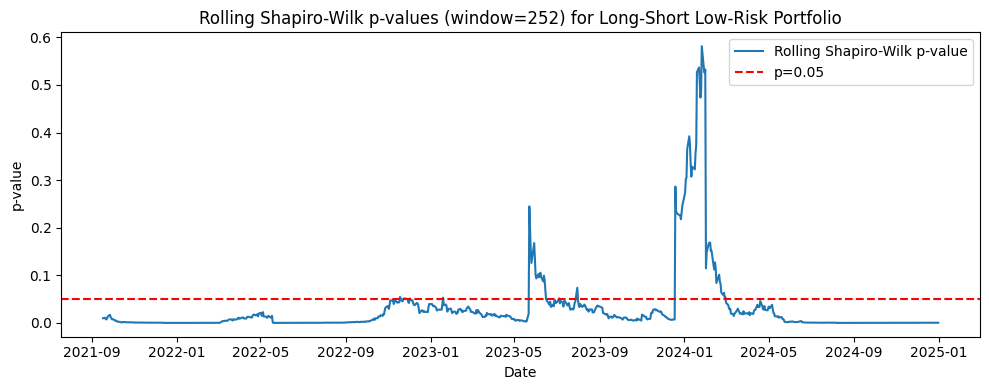


Normality tests for the entire long-short low-risk portfolio log returns:
  Shapiro-Wilk: stat=0.9831, p=0.0000
  Anderson-Darling: stat=3.9650
  D'Agostino-Pearson: stat=48.1212, p=0.0000
  Kolmogorov-Smirnov: stat=0.0435, p=0.0327

Plotting rolling Shapiro-Wilk p-values for the long-short portfolio (window=252)...


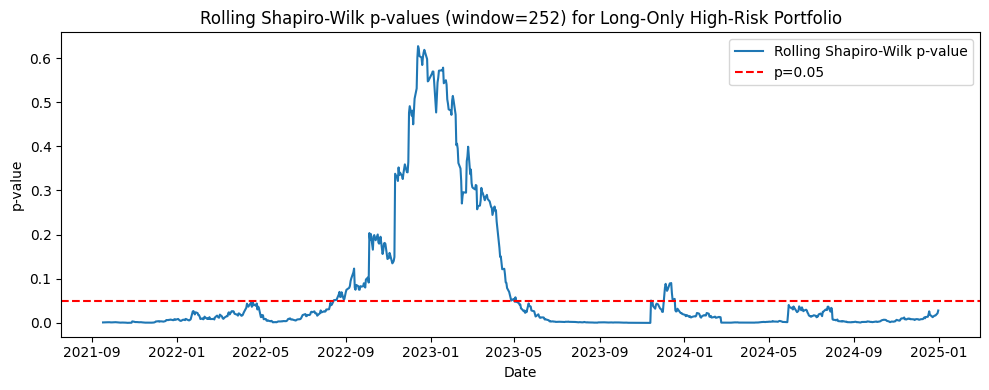


Normality tests for the entire long-only high-risk portfolio log returns:
  Shapiro-Wilk: stat=0.9903, p=0.0000
  Anderson-Darling: stat=3.1029
  D'Agostino-Pearson: stat=22.8195, p=0.0000
  Kolmogorov-Smirnov: stat=0.0451, p=0.0239

Plotting rolling Shapiro-Wilk p-values for the long-short portfolio (window=252)...


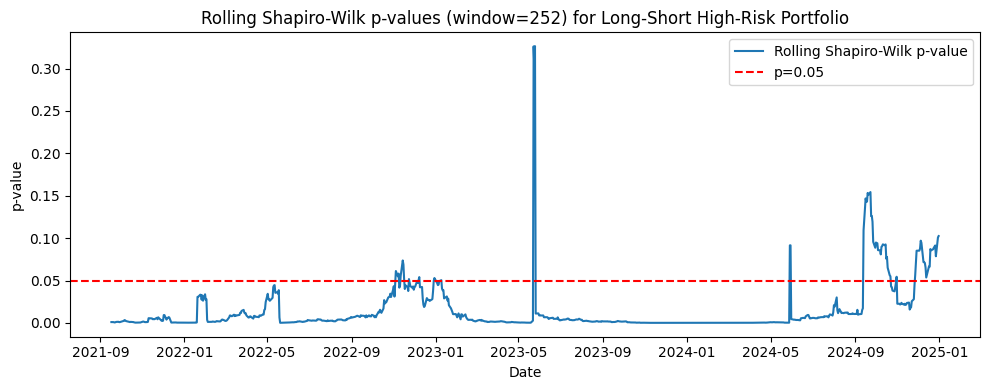


Normality tests for the entire long-short high-risk portfolio log returns:
  Shapiro-Wilk: stat=0.9878, p=0.0000
  Anderson-Darling: stat=2.3680
  D'Agostino-Pearson: stat=36.8536, p=0.0000
  Kolmogorov-Smirnov: stat=0.0331, p=0.1833


In [18]:
# --- CONFIGURATION ---
# D_L_low_risk, D_LS_low_risk, D_L_high_risk, D_LS_high_risk
PORTFOLIO_WEIGHTS = Tech_L_low_risk
tickers = list(PORTFOLIO_WEIGHTS.keys())
print("Downloading data...")
prices = download_data(tickers, START_DATE, END_DATE)
log_returns = compute_log_returns(prices)

# Align log returns and weights
available = [t for t in tickers if t in log_returns.columns]
weights = np.array([PORTFOLIO_WEIGHTS[t] for t in available])
port_lr = log_returns[available].dot(weights)

# Plot rolling Shapiro-Wilk p-values
print(f"\nPlotting rolling Shapiro-Wilk p-values for the long-short portfolio (window={ROLLING_WINDOW})...")
plot_rolling_shapiro(port_lr, window=ROLLING_WINDOW, title=f'Rolling Shapiro-Wilk p-values (window={ROLLING_WINDOW}) for Long-Only Low-Risk Portfolio')

# Print normality test results
print("\nNormality tests for the long-only low-risk portfolio log returns:")
results = normality_tests(port_lr)
for test, res in results.items():
    if isinstance(res, tuple):
        print(f"  {test}: stat={res[0]:.4f}, p={res[1]:.4f}" if len(res)==2 else f"  {test}: stat={res[0]:.4f}")
    else:
        print(f"  {test}: {res}")

# D_L_low_risk, D_LS_low_risk, D_L_high_risk, D_LS_high_risk
PORTFOLIO_WEIGHTS = Tech_LS_low_risk
weights = np.array([PORTFOLIO_WEIGHTS[t] for t in available])
port_lr = log_returns[available].dot(weights)

# Plot rolling Shapiro-Wilk p-values
print(f"\nPlotting rolling Shapiro-Wilk p-values for the long-short portfolio (window={ROLLING_WINDOW})...")
plot_rolling_shapiro(port_lr, window=ROLLING_WINDOW, title=f'Rolling Shapiro-Wilk p-values (window={ROLLING_WINDOW}) for Long-Short Low-Risk Portfolio')

# Print normality test results
print("\nNormality tests for the entire long-short low-risk portfolio log returns:")
results = normality_tests(port_lr)
for test, res in results.items():
    if isinstance(res, tuple):
        print(f"  {test}: stat={res[0]:.4f}, p={res[1]:.4f}" if len(res)==2 else f"  {test}: stat={res[0]:.4f}")
    else:
        print(f"  {test}: {res}")

# D_L_low_risk, D_LS_low_risk, D_L_high_risk, D_LS_high_risk
PORTFOLIO_WEIGHTS = Tech_L_high_risk
weights = np.array([PORTFOLIO_WEIGHTS[t] for t in available])
port_lr = log_returns[available].dot(weights)

# Plot rolling Shapiro-Wilk p-values
print(f"\nPlotting rolling Shapiro-Wilk p-values for the long-short portfolio (window={ROLLING_WINDOW})...")
plot_rolling_shapiro(port_lr, window=ROLLING_WINDOW, title=f'Rolling Shapiro-Wilk p-values (window={ROLLING_WINDOW}) for Long-Only High-Risk Portfolio')

# Print normality test results
print("\nNormality tests for the entire long-only high-risk portfolio log returns:")
results = normality_tests(port_lr)
for test, res in results.items():
    if isinstance(res, tuple):
        print(f"  {test}: stat={res[0]:.4f}, p={res[1]:.4f}" if len(res)==2 else f"  {test}: stat={res[0]:.4f}")
    else:
        print(f"  {test}: {res}")

# D_L_low_risk, D_LS_low_risk, D_L_high_risk, D_LS_high_risk
PORTFOLIO_WEIGHTS = Tech_LS_high_risk
weights = np.array([PORTFOLIO_WEIGHTS[t] for t in available])
port_lr = log_returns[available].dot(weights)

# Plot rolling Shapiro-Wilk p-values
print(f"\nPlotting rolling Shapiro-Wilk p-values for the long-short portfolio (window={ROLLING_WINDOW})...")
plot_rolling_shapiro(port_lr, window=ROLLING_WINDOW, title=f'Rolling Shapiro-Wilk p-values (window={ROLLING_WINDOW}) for Long-Short High-Risk Portfolio')

# Print normality test results
print("\nNormality tests for the entire long-short high-risk portfolio log returns:")
results = normality_tests(port_lr)
for test, res in results.items():
    if isinstance(res, tuple):
        print(f"  {test}: stat={res[0]:.4f}, p={res[1]:.4f}" if len(res)==2 else f"  {test}: stat={res[0]:.4f}")
    else:
        print(f"  {test}: {res}")